# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Modles

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from import_file import *
from helpers.parallel_helper import *
load_libs()

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0.
plt.rcParams['axes.ymargin'] = 0.

## 1.2 Read Data

In [2]:
# ipath= "./data/NCDC/us/baltimore/dat.txt" # time too short
# ipath= './data/NCDC/uk/boscombe_down/dat.txt' # 4?
# ipath= './data/NCDC/uk/middle_wallop/dat.txt' # good
# ipath= './data/NCDC/uk/southhamption/dat.txt' # high 0
# ipath= './data/NCDC/uk/bournemouth/dat.txt' 4?
ipath= './data/NCDC/uk/tiree/dat.txt'  # try 4
# ipath= "./data/NCDC/uk/bealach_na_ba/dat.txt" # 
# ipath= "./data/NCDC/uk/skye_lusa/dat.txt" # 
# ipath= "./data/NCDC/uk/south_uist_range/dat.txt" 
# ipath= './data/NCDC/uk/marham/dat.txt' 
# ipath= "./data/NCDC/uk/holbeach/dat.txt"
# ipath= "./data/NCDC/uk/weybourne/dat.txt"
# ipath= "./data/NCDC/uk/cambridge/dat.txt"
# ipath= "./data/NCDC/uk/wattisham/dat.txt"
# ipath= "./data/NCDC/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?

# ipath= "./data/NCDC/southeast_asia/singapore_changi/dat.txt" # 4 or 5?
# ipath= "./data/NCDC/southeast_asia/sultan_ismail/dat.txt" # 
# ipath= "./data/NCDC/southeast_asia/paya_lebar/dat.txt" # 2010-2014 has problem
# ipath= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good
# ipath= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good

# ipath= "./data/NCDC/europe/landsberg_lech/dat.txt" # very good, can try 4
# ipath= "./data/NCDC/europe/laupheim/dat.txt" # double peak, 4; very good
# ipath= "./data/NCDC/europe/vatry/dat.txt"  # double peak, initial speed (should be good with m/s)
# ipath= "./data/NCDC/europe/avord/dat.txt" # try 4, initial speed (should be good with m/s)
# ipath= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?
# ipath= "./data/NCDC/europe/holzdorf/dat.txt"
# ipath= "./data/NCDC/europe/neuburg/dat.txt"
# ipath= "./data/NCDC/europe/valladolid/dat.txt"
# ipath= "./data/NCDC/europe/barayas/dat.txt" # 
# ipath= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# ipath= "./data/NCDC/europe/diepholz/dat.txt" # recent year is integer with less data, use m/s
# ipath= './data/NCDC/europe/tenerife_sur/dat.txt'  # some directions are blocked

# ipath= "./data/NCDC/oceania/narrandera/dat.txt" # high 0
# ipath= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0
# ipath= "./data/NCDC/oceania/auckland_intl/dat.txt"  # Weird KDE shape, 4?
# ipath= "./data/NCDC/oceania/canberra/dat.txt" # high 0

# ipath= "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt" 
# ipath= "./data/NCDC/cn/shanghai/pudong/dat.txt"
# ipath= "./data/NCDC/cn/tianjing/binhai/dat.txt" # recent 5 year has small problem, good overall, few 0
# ipath= "./data/NCDC/cn/tianjing/tianjing/dat.txt" # 16 sectors
# ipath= "./data/NCDC/cn/hefei_luogang/dat.txt" # recent 5 year has small problem, good overall, few 0
# ipath= "./data/NCDC/cn/南京lukou/dat.txt" 
# ipath= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# ipath= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# ipath= "./data/NCDC/cn/郑州xinzheng/dat.txt" # fit is not good
# ipath= "./data/NCDC/cn/nanning_wuxu/dat.txt" # recent 5 year has problem
# ipath= './data/NCDC/cn/macau/dat.txt'  
# ipath= "./data/NCDC/cn/hk_intl/dat.txt" # few initial data

# ipath= "./data/NCDC/us/sheboygan/dat.txt" # untruncate us dataset, but recent 5 year maybe corrupted

# ipath= "./data/cn_database/广州.txt" 
# ipath= "./data/cn_database/北京.txt" 

file_path = ipath

if not "cn_database" in ipath: 
    df = pd.read_csv(file_path,header=0, skipinitialspace=True)
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type' ]]
else:
    df = read_cn_database(file_path)
    
integer_data = True

In [3]:
# file_path = 'DSM/DSM_hr_avg.csv'

# df = pd.read_csv(file_path, header=0, skipinitialspace=True)
# # df['speed']=pd.to_numeric(df['speed'], downcast='integer', errors='coerce')
# # df['dir']=pd.to_numeric(df['dir'], downcast='integer', errors='coerce')
# df['type']='default'
# df['wind_type']='default'
# df = df.dropna()

# integer_data = False
# knot_unit = True

In [4]:
df = df.query("(dir <= 999) & (speed < 100) & \
              (date >= 19700000) & (date < 20160000) ")

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


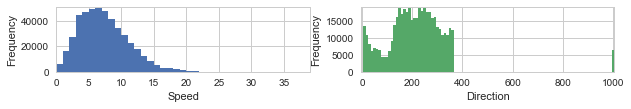

In [5]:
plot_speed_and_angle_distribution(df.speed, df.dir)

In [6]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
df['month'] = df['date']%10000//100
df['speed_origin'] = df['speed']
# Convert Windrose coordianates to Polar Cooridinates 
df['dir_windrose'] = df['dir']
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
df.describe()

date           HrMn            dir          speed  \
count  4.703340e+05  470334.000000  470334.000000  470334.000000   
mean   2.000300e+07    1153.105529     205.386744       7.283531   
std    1.127487e+05     669.378092     128.859325       3.840740   
min    1.979010e+07       0.000000       0.000000       0.000000   
25%    1.990101e+07     600.000000     130.000000       4.600000   
50%    2.002061e+07    1120.000000     200.000000       6.700000   
75%    2.011052e+07    1700.000000     270.000000       9.800000   
max    2.015123e+07    2350.000000     999.000000      38.600000   

               month   speed_origin   dir_windrose  
count  470334.000000  470334.000000  470334.000000  
mean        6.562462       7.283531     205.010760  
std         3.449571       3.840740     133.522418  
min         1.000000       0.000000       0.000000  
25%         4.000000       4.600000     140.000000  
50%         7.000000       6.700000     200.000000  
75%        10.000000       9.800000     270.000000  
max        12.000000      38.600000     999.000000

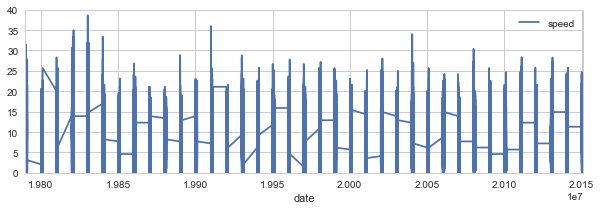

In [7]:
df.plot(x='date', y='speed',legend=True,figsize=(10,3))

### 1.2.1 Unit Detection

True


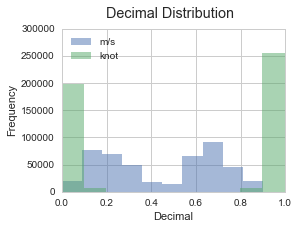

In [8]:
if 'knot_unit' not in globals():
    df['decimal'] = df.speed % 1
    df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))
    knot_unit = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False

    if knot_unit:
        df['speed'] = df['speed'] * 1.943845
        df['decimal'] = df.speed % 1
        df.decimal.hist(alpha=0.5, label='knot')
        # need more elaboration, some is not near an integer
        df['speed'] = df['speed'].apply(lambda x: int(round(x)))
    plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')

print(knot_unit)

### 1.2.2 Sampling Type Selection

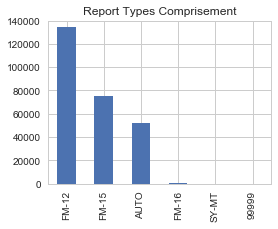

In [9]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.2.3 Sampling Time Selection

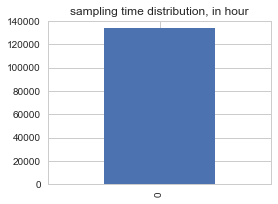

In [10]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_time.value_counts().plot(
    kind = 'bar', title = 'sampling time distribution, in hour', figsize=(4,3))

# Need more elaboration
sample_times = sample_time.value_counts()[sample_time.value_counts() > 2000]
sample_times = sample_times.index.tolist()
df = df.query("sample_time in @sample_times")
df.drop(['sample_time'], 1,inplace=True)

In [11]:
df['HrMn'].value_counts().sort_index()

0       12808
100     12822
200     12815
300     12886
400     12847
500     12821
600     12879
700     12630
800     12191
900     11708
1000    11228
1100    11225
1200    11571
1300    11792
1400    12068
1500    12481
1600    12625
1700    12713
1800    12844
1900    12798
2000    12803
2100    12909
2200    12834
2300    12834
Name: HrMn, dtype: int64

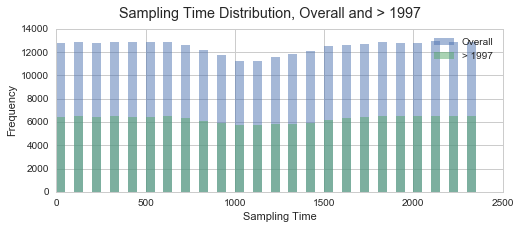

In [12]:
MID_YEAR = (min(df.date)//10000+max(df.date)//10000)//2
bins=arange(0, 2400+100, 50)

df['HrMn'].plot(kind='hist', alpha=0.5,bins=bins, label='Overall')

df.query('date > @MID_YEAR * 10000')['HrMn'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

## 1.3 Data Wrangling

### 1.3.1 Artefacts

#### 1.3.1.1 wrong direction record

In [13]:
if integer_data:
    display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
    df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

Empty DataFrame
Columns: [date, HrMn, type, dir, speed, wind_type, month, speed_origin, dir_windrose, decimal]
Index: []

#### 1.3.1.2 sudden increase in speed

date  HrMn   type  dir  speed wind_type  month  speed_origin  \
120455  19910103   600  FM-12  200     70         N      1          36.0   
253470  20040421  1100  FM-12  290     66         N      4          34.0   
44291   19831018  1400  FM-12  210     61         N     10          31.4   
3032    19790509   100  FM-12  140     61         N      5          31.4   
97226   19890213  1500  FM-12  160     56         N      2          28.8   
146657  19930121  2100  FM-12  180     56         N      1          28.8   
367283  20111208  1400  FM-12  180     55         N     12          28.3   
3702    19790606   400  FM-12  250     55         N      6          28.3   
18751   19810227   400  FM-12  320     55         N      2          28.3   
146499  19930117   500  FM-12  180     55         N      1          28.3   

        dir_windrose   decimal  incre  incre_reverse  
120455           250  0.978420   44.0           46.0  
253470           160  0.090730   33.0           32.0  
44291            240  0.036733   31.0           24.0  
3032             310  0.036733   45.0           48.0  
97226            290  0.982736    6.0            6.0  
146657           270  0.982736    8.0            6.0  
367283           270  0.010814    3.0            6.0  
3702             200  0.010814   49.0           48.0  
18751            130  0.010814   19.0           22.0  
146499           270  0.010814   12.0            3.0

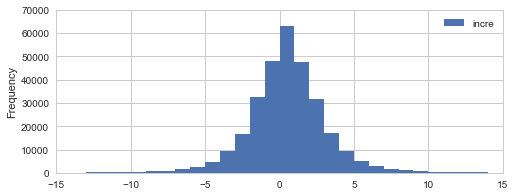

In [14]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [15]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

# Check the max speed
df.sort_values(by='speed',ascending=False).head(10)

sudden increase number 22


date  HrMn   type  dir  speed wind_type  month  speed_origin  \
146657  19930121  2100  FM-12  180     56         N      1          28.8   
97226   19890213  1500  FM-12  160     56         N      2          28.8   
146499  19930117   500  FM-12  180     55         N      1          28.3   
367283  20111208  1400  FM-12  180     55         N     12          28.3   
18751   19810227   400  FM-12  320     55         N      2          28.3   
47032   19840121  1900  FM-12  310     54         N      1          27.8   
8326    19791217   100  FM-12  210     54         N     12          27.8   
367281  20111208  1200  FM-12  190     54         N     12          27.8   
8325    19791217     0  FM-12  210     53         N     12          27.3   
292545  20080109   500  FM-12  170     53         N      1          27.2   

        dir_windrose   decimal  incre  incre_reverse  
146657           270  0.982736    8.0            6.0  
97226            290  0.982736    6.0            6.0  
146499           270  0.010814   12.0            3.0  
367283           270  0.010814    3.0            6.0  
18751            130  0.010814   19.0           22.0  
47032            140  0.038891    4.0            2.0  
8326             240  0.038891    1.0            2.0  
367281           260  0.038891    2.0            2.0  
8325             240  0.066969    1.0           -1.0  
292545           280  0.872584   13.0           15.0

### 1.3.2 0 Speed

In [16]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df.query("(date >= 20050000)"))
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

False 0.00669354143313


### 1.3.3 Direction re-aligment and 999
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,30,50], need to redistribute the angle into 22.5

In [17]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
try:
    SECTOR_LENGTH = 360/len(effective_column) 
except: 
    SECTOR_LENGTH = 10
print(len(effective_column), SECTOR_LENGTH)

0       2844
10      2774
20      4149
30      4400
40      4500
50      3914
60      5092
70      6598
80      8572
90      8342
100     8554
110     7151
120     7541
130     6931
140     7978
150     8396
160    10301
170    10061
180    10951
190    11003
200    12180
210    11258
220    12002
230    10130
240    10149
250     9770
260    11952
270    11010
280    11943
290    10906
300    12159
310    10136
320     8728
330     5788
340     4119
350     2792
999     4033
Name: dir, dtype: int64

36 10.0


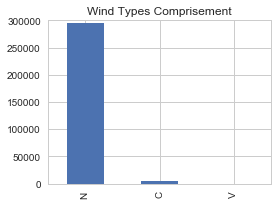

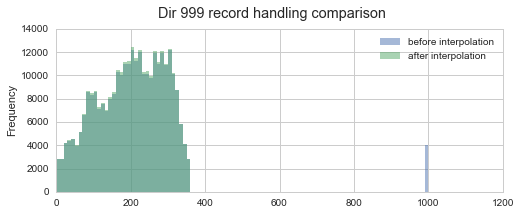

In [18]:
df=realign_direction(df, effective_column)
df=fill_direction_999(df, SECTOR_LENGTH)

### 1.3.4 Time Shift Comparison

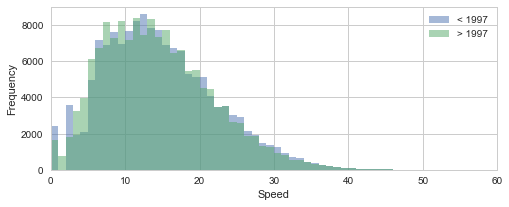

In [19]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, max(df.speed) + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=(8, 3))

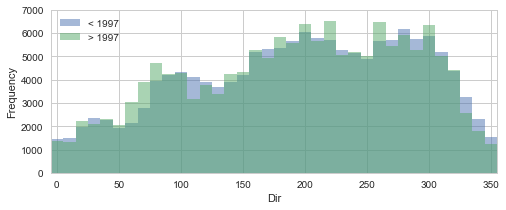

In [20]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3),tight='x')

1979 - 1979


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


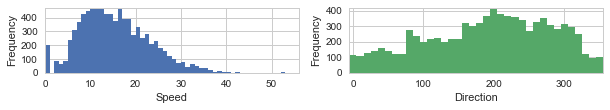

1980 - 1984


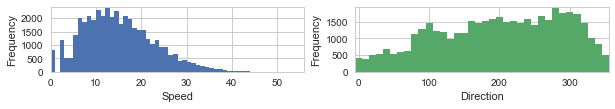

1985 - 1989


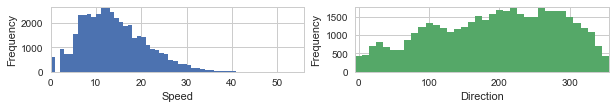

1990 - 1994


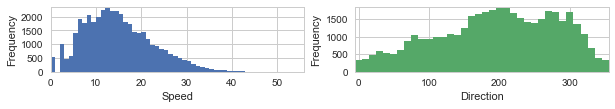

1995 - 1999


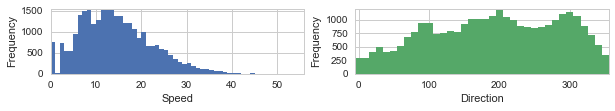

2000 - 2004


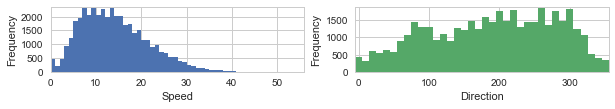

2005 - 2009


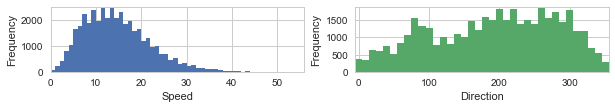

2010 - 2014


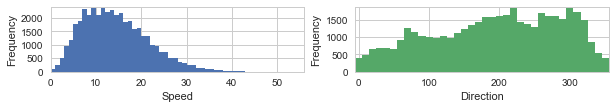

2015 - 2015


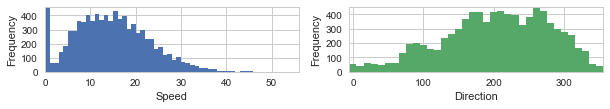

In [21]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df)

## 1.4 Re-distribute Direction and Speed
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

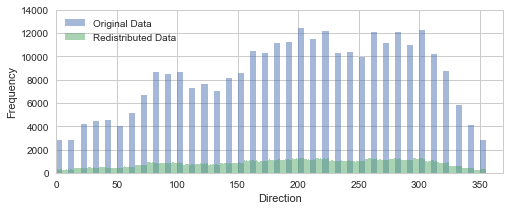

In [22]:
if integer_data:
    df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)

Redistribute upward, e.g. 0 -> [0,1]


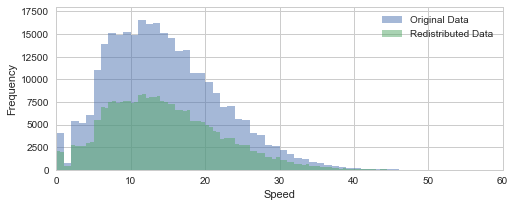

In [23]:
if integer_data:
    if delete_zero:
        redistribute_method = 'down'
    else:
        redistribute_method = 'up'

    df, speed_redistribution_info = randomize_speed(df, redistribute_method)

## 1.5 Generate (x,y) from (speed,dir)

In [24]:
# Cook orientation
# df['dir']= (df['dir'] + 180)%360

In [25]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Configs

## 2.1 Data Overview

In [26]:
## Summery of the data selection
print('Knot unit?', knot_unit)
print('Report type used:', report_type_most_used)
print('Sampling time used:', sample_times)
if 'speed_redistribution_info' in globals():
    print('Speed redistribution info:', speed_redistribution_info )

df_all_years = df # for later across-year comparison
df = df_all_years.query('(date >= 20100000) & (date < 20150000)')
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
df.describe()

Knot unit? True
Report type used: FM-12
Sampling time used: [0]
Speed redistribution info: Redistribute upward, e.g. 0 -> [0,1]


date          HrMn           dir         speed         month  \
count  4.283700e+04  42837.000000  42837.000000  42837.000000  42837.000000   
mean   2.012072e+07   1148.978687    193.693176     14.400160      6.518150   
std    1.413668e+04    693.172819     91.001654      7.308486      3.459189   
min    2.010010e+07      0.000000     -4.982866      0.002424      1.000000   
25%    2.011040e+07    500.000000    122.528826      8.810042      4.000000   
50%    2.012070e+07   1100.000000    202.364728     13.508906      7.000000   
75%    2.013100e+07   1800.000000    270.891324     18.990284     10.000000   
max    2.014123e+07   2300.000000    354.938669     55.290084     12.000000   

       speed_origin  dir_windrose       decimal         incre  incre_reverse  \
count  42837.000000  42837.000000  42837.000000  42837.000000   42837.000000   
mean       7.150445    191.330789      0.546484      0.000280      -0.000303   
std        3.756584    102.782601      0.450140      2.535876       2.535862   
min        0.000000      0.000000      0.000000    -23.000000     -29.000000   
25%        4.100000    130.000000      0.051839     -1.000000      -1.000000   
50%        6.700000    200.000000      0.911451      0.000000       0.000000   
75%        9.300000    270.000000      0.967607      1.000000       1.000000   
max       28.300000    999.000000      0.997842     29.000000      23.000000   

                  x             y  
count  42837.000000  42837.000000  
mean      -2.258362     -2.886772  
std       10.600518     11.618023  
min      -55.250842    -48.832022  
25%       -9.362313    -11.043498  
50%       -2.138955     -3.057131  
75%        5.046644      5.529189  
max       36.923116     38.295649

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


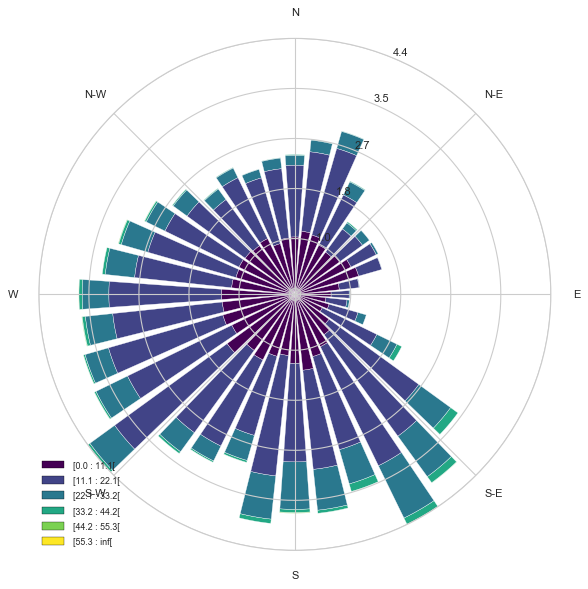

In [27]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [28]:
ax, _params = WindAxes.from_ax().pdf(df.speed, bins=arange(0, max(df.speed)))
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF')

fig,ax = plt.subplots()
ecdf = sm.distributions.ECDF(df.speed)
x = linspace(0, df.speed.max())
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label='ECDF')

k_shape, _, lamb_scale = sp.stats.weibull_min.fit(df.speed, loc=0)
y=1-exp(-(x/lamb_scale)**k_shape) # cdf
plot(log(x), log(-log(1-y)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'},figsize=(4,3))
align_figures()
print(k_shape, lamb_scale)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAToAAADpCAYAAAC0n/tpAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAMTQAADE0B0s6tTgAAIABJREFUeJzt3XtclGX+//HXDDOAgoKIgFptpoknPGUIbuVpMQlCtGwz
D2WmuVm7a6vfDqwZ2dpGtpU/t6Mmrp1JTUiozDQNFUJFUTxnmqIMBzVBY07374+JUUTlNMM9DJ/n
48HDueY+vZnRj/c9c1/XpVEURUEIIdyYVu0AQgjhbFLohBBuTwqdEMLtSaETQrg9KXRCCLcnhU4I
4fak0Akh3J7TC11GRgYxMTGMGDGCRYsWVVteWFjIxIkTiY6OZtKkSZSUlABgNBp58cUXGTVqFDEx
Mfzwww/OjiqEcFNOLXRFRUUkJSWxfPly1qxZQ05ODps2baqyTmJiImPGjCEjI4O4uDj+9a9/AbB4
8WJOnz7NF198weuvv87TTz+N1Wp1ZlwhhJtyaqHLzMwkIiKCgIAA9Ho98fHxpKen25ebTCaysrKI
jY0FID4+ng0bNmAymcjIyGDq1KloNBpuvvlmkpOTkU4cQoj60Dlz5waDgaCgIHs7KCiIwsJCe/vM
mTP4+Pig1+ttYXQ6fH19KS0t5ejRo2zbto2EhAQ8PDx48skn6dKlyzWPZ7VaMZvNaLVaNBqNc34p
IYQqFEXBarWi0+nQaut2jubUQnelS81LC9DVLkW1Wi0Wi4Xjx4/z+eefs3//fh555BEyMjJo1arV
VY9nNpvJy8treHAhhMsKCwvD09OzTts4tdCFhISQnZ1tbxsMBkJCQuztgIAAysrKMJvN6HQ6zGYz
5eXl+Pv7ExgYSHR0NBqNhm7duhESEsKRI0fo3bv3VY9XWeVDQ0Pr/EI0FovFQn5+Pj169MDDw0Pt
OFfVFHJKRsdpCjmNRiP79++v89kcOLnQRUZGsnDhQoqLi/Hz8yM1NZVx48bZl+v1esLDw0lLS2P0
6NGkpaURHh6OXq9n6NChZGRk0Lt3b44fP87Jkyfp1KnTNY9Xebbo6enp0oUObBld9S8UNI2cktFx
mkpOoF4fSzn1y4jg4GBmz57N5MmTiY2NJTQ0lKioKBISEli3bh0Ac+fOZfXq1cTExJCSksKcOXMA
mDVrFiUlJcTExPDoo4/ywgsvXPOyVQghrsapZ3QA0dHRREdHV3mu8hYSgPbt25OcnFxtO19fX5KS
kpwdTwjRDEjPCCGE25NCJ4Rwe1LohBBuTwqdEMLtSaETQrg9KXSNRKOx/eh0rn2PkhDuSAqdEMLt
SaETQrg9p98wLGrn0l4tMhqVEI4lZ3RCCLcnhU4I4fbk0tVBHHLp2foXCN7F9z/70qZFG3q064FO
K2+REA0l/4pUZrKYWJi1EKb/D0J2ATBkmW1Zx1Ydebjfw0y7ZRrXtb5OxZRCNG1y6aqiXYW7GLh4
ILPWzrIVufJ2sDeemJtjCAsK48S5E8zbOI8e/+3B8p3LZc4MIepJCp1K0g6kMeDdAew4tYOe7XpC
8npYcAo+XcWXD3zJrr/sYsejO5jYeyLnjOeY9MUktPdOQKP/Te3oQjQ5UuhUsMWwhT+v+DMmq4nZ
g2azbdo2+HkIKFXfjr4hffnf6P+x8r6VcD4Aen8E991DhblCneBCNFFS6Brb9ZnMypmF0WLk+cHP
kxSVhJfO65qbjO4+Gt77Ec5eD13TueczKXZC1IUUusbkfRruvZ8KawWzImfx3ODnar/t6Ztsl7e/
dmTNwTXMSJ/hvJxCuBkpdI1Ggdi/gN9xBgYOZP6w+XWf5ON0Z1j2HX5efizZsYQl25c4J6oQbkYK
XWPp/SH0+hTOt+X5vs+j1Vz7pa8c7aRaLSzpyrJ42/0nM9JnsK1gm5MCC+E+pNA1gtMXTsPIv9ka
qe/Rzrtdg/Y3qtsonv7j01RYKhi3YhwXTBcckFII9+X0QpeRkUFMTAwjRoxg0aJF1ZYXFhYyceJE
oqOjmTRpEiUlJQBcuHCBfv36MWrUKPtP5dyTTc38TfOhZSnsjYd9ox2yz3nD5jGw40AOlh4k8ftE
h+xTCHfl1EJXVFREUlISy5cvZ82aNeTk5LBp06Yq6yQmJjJmzBgyMjKIi4uzT4W4Z88eIiIiWL16
tf3H1SfWvZIjp4+wMHshWHTw7csO269Oq2NJ3BL0Wj0LNi9gW8G2q1/uCtHMObXQZWZmEhERQUBA
AHq9nvj4eNLT0+3LTSYTWVlZxMbGAhAfH8+GDRswmUzk5eVRWFjI2LFjuf/++8nJyXFmVKd5Zt0z
GC1GyPkLlHR16L57BvXkn3f8E4ti4eHUh0Frduj+hXAXTu3rajAYCAoKsreDgoIoLCy0t8+cOYOP
jw96vd4WRqfD19eX0tJSNBoNI0eOZOrUqeTn5/Poo4+SlpZGmzZtajyuxWJR4TL34tlm5bF3Fu7k
0z2f4uflx9nvq95KUj3f5dvX1LaZHTmblD0p7CrcBf3fsxXUK+6/biq3d+WPCySj4zSFnA3J5tRC
Z7Vaqz136S0VV1oOoNVqeeihh+ztnj17EhYWxvbt2xk+fHiNx83Pz6972Aa7xf4oNzcXgDk75gBw
3w338d75wCpr5+Xl1bB9Te2LHuv8GI8VPQZDn4Pd4+A3/2rr1Ff1nK5HMjpOU8lZV04tdCEhIWRn
Z9vbBoOBkJAQezsgIICysjLMZjM6nQ6z2Ux5eTn+/v6kpKRw22230b59ewAURUGnq13cHj164Onp
6dhfpg769u3L0TNH+WbNN3jrvHkh9gXeu2ydsLCwq37m2Ldv37q16Ut6STpfHvwSbv8XrH2l2jp1
ZbFYyMvLu2ZOtUlGx2kKOY1GY71PYpxa6CIjI1m4cCHFxcX4+fmRmprKuHHj7Mv1ej3h4eGkpaUx
evRo0tLSCA8PR6/Xk5eXx08//cRTTz3FoUOHyM/P55ZbbrnG0S7y8PBQ9c3y8PCg8/j/B5EWLJsf
JSQhpNo6Xl4XC/Hlg5Jcnv1q7cqTY0WBV+98lS/3fQURb0DOdDw8OjvgN1H/tawNyeg4rpyzIbmc
+mVEcHAws2fPZvLkycTGxhIaGkpUVBQJCQmsW7cOgLlz57J69WpiYmJISUlhzhzb5d7MmTM5cuQI
MTExzJw5k6SkJHx9fZ0Z12FOXzgNt7wHVi1sebJRjtm1bVf48THwMMHgFxrlmEI0FU4feDM6Opro
6Ogqz1XeQgLQvn17kpOTq23Xpk0b3n77bWfHc4rF2xeDZznsudfWbauxbHoW+i+G3h+wv/hZQgND
G+/YQrgw6RnhcAqLdyy2Pcz6a+MeujwYsh8HrVVuIhbiElLoHO0PmzhQcgCKQ+HYbY1//M2zocKX
T3Z/wh7DnsY/vhAuSAqdo/X//fvV7Y8AKnRROB8IWX9DQWHexnmNf3whXJAUOkfyPg09Pkev1cPO
Serl2PIkPnofUvJTOFx6WL0cQrgIKXSO1PtD0P/GqG6joDyo5vWd5UIA026ZhlWxsmDzAvVyCOEi
pNA5Uh/bOHFT+k1ROQg8Gfkkeq2epblLOVV2Su04QqhKCp2jBByCjjlQFkzUTVFqp+G61tcxofcE
KiwVvLH1DbXjCKEqKXSO0vNT2597xuKhdY07y2cPmg3AWzlvca7inMpphFCPFDpH6fWJ7c/d96ub
4xLd23UntmssZyvOsmznMrXjCKEaKXQOsNuwG4J3w9nr4Hik2nGq+PvAvwPwRtYbWJUrjxYjhLuT
QucAn+6uvGz9c7VJqNU2rNMwegX14lDpIdIPpte8gRBuyLX+VTZBiqLwyR7Xu2ytpNFo7Gd1r299
XeU0QqhDCl09Vc7NsNuwm0Olh+B0Jyio3TBSje2BsAcIbBnIuiPr0ATnyZwSotmRQtdAqftTbQ/2
xaNKl69aaKF

2.07917375133 16.2987275592


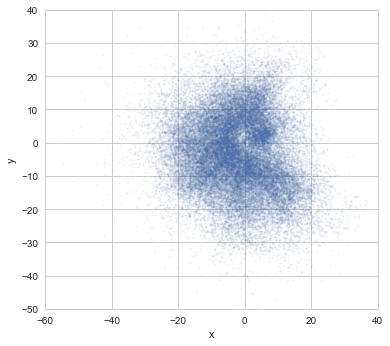

In [29]:
df.plot(kind='scatter', x='x', y='y', alpha=0.10, s=2)
plt.gca().set_aspect('equal')

## 2.2. Overview by Direction

In [30]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 10

In [31]:
original_incre, incre = SECTOR_LENGTH, rebinned_angle
start, end = -original_incre/2 + incre/2, 360

max_speed = df.speed.max()
max_count = max_count_for_angles(df, start, end, incre)
plot_range = [0, max_speed, 0, max_count*1.05]

for angle in arange(start, end, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)   
    
    fig = plt.figure()
    title ='%s (%s - %s), %s' % (angle, start_angle, end_angle, len(sub_df)) 
    sub_df['speed'].hist(bins=arange(0, max_speed), alpha=0.5, label='Data')
    plt.axis(plot_range)
    plt_configure(figsize=(3,1.5), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAM0AAAB6CAYAAAAcc9ekAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAADulJREFUeJzt3XtMFNfbB/DvcitEUGgo2LTBiogUI7DKRULBtFasRat4
aRHBRCyCSVOpbQNWUSuoaKKJMWrxglos1VYhbar210KqJCVeQGgBxbpasLZys2BZ7pfn/cMwLysL
zIHFZZfnk5A4Zw47z1n87pmdnZ1REBGBMSabib4LYMzQcGgYE8ShYUwQh4YxQRwaxgRxaBgTZFSh
aW9vx7Zt2+Dn5wc/Pz/s3r0bnZ2dOusPAGq1GgsWLEB9fX2ffTZv3owpU6Zo/Gzbtq3P/nfu3MGK
FSvg6emJkJAQ5ObmDjzYAaxevbpXDceOHeuzf35+PkJDQ+Hh4YElS5aguLhYWvfTTz9hw4YNQtvv
6urC4cOH8eabb0KpVOK9995DQUGB7PVP1979I1rHsCAjkpKSQnPmzKHCwkL69ddfKSAggA4cOKCz
/kRESUlJ9MUXX/TbJywsjA4ePEjV1dXST0NDg9a+zc3NFBQURImJiaRSqejAgQM0bdo0Ki8vH3jA
/QgMDKSsrCyNGpqamrT2raysJKVSSfv27SOVSkVbt24lPz8/evz4sdRnyZIldPXqVdnbP378OPn6
+tLPP/9Mf/75J+3atYu8vLzowYMHstb3rLu6uprOnTtHU6dOpeLi4iE8K7phNKFpaWkhT09Pys7O
ltoyMzPJ39+fOjs7h9yf6Mkf0svLi+rr6/utxdfXly5fviyr7qysLPL396e2tjapLSIiglJSUmT9
vjYNDQ3k6upKKpVKVv/9+/fTokWLpOWuri6aPXs2paena9QZEREhu4b58+dTamqqRltwcDAdP35c
1vqeGhsbKTAwkA4dOiR7+8PJaHbPbt26hebmZvj6+kpt3t7eePToEe7fvz/k/gBw5swZKJVKjBs3
rs86ampqUF9fj4kTJ8qq+8aNG1AqlTA3N5fafHx8UFhYKOv3tVGpVDAzM4OTk5Os/oWFhfDx8ZGW
FQoFZsyYoVHD66+/jsLCQty+fVvWYyYmJuKdd97p1d7Q0CBrfU/Hjx+Hubk5oqKiZG17uBlNaKqq
qmBlZQUbGxup7YUXXgAAVFZWDrk/AFy6dAmBgYH91qFSqaBQKHDkyBHMmjULb7/9NtLS0tDV1aW1
f3V1NRwcHDTa7O3tUVVV1e92BqrB2toaCQkJeO2117Bw4UJkZWX12V9ODePGjcO0adNw+fJlWTX4
+vpi/Pjx0vKlS5dQXl4Of39/Weu7tbS04OTJk4iJiYGFhYWsbQ83owlNc3MznnvuOY227ie5ra1t
yP07Oztx8+ZNuLi49FvHvXv3YGJiAicnJxw+fBhRUVE4cOAAjh49KlS3thrkunv3LlpaWuDv74+j
R49i0aJFSExMxPnz54dUg4uLC0pKSoTrUalUiI+Px/z58+Ht7S20/ocffoCJiQkWLlwovN3hYqbv
AnTF0tKy1x+5e9nKymrI/evr69HZ2Qk7Ozup7f3339c44nP+/HmEh4cjJCQEtra2AJ4cBXr8+DFO
nDiBNWvWyK7D0tJS6zhDQkLwzz//SMvaduM++eQTxMbGSruRbm5u+Ouvv5Ceno6QkJBB12Bra4t7
9+5prasvJSUliI6OxuTJk7F9+3bh9RcuXMC8efN6hVqfjCY048ePR1NTE9RqNaytrQE8eX8BAI6O
jkPur1AoAEBjN2v79u1oaWmRlh0cHKBQKKTAdHNxcUFtbS06Ozthamqqsc7R0VHabreamhqtNQDA
4cOH0dHRoXVdN1NT017vuyZNmoRLly5p7S+3hs7OTpiYyN85uX79OmJiYuDp6YmDBw/2CuFA65ua
mnDt2jVER0fL3uazYDS7Z25ubrCystJ45c/Pz4e9vb3WN8Si/e3s7GBmZoa6ujqpzdHRERMmTJB+
zMzMsH37dqxatUrjd0tKSvDKK6/0CgwAKJVKFBYWagQhPz8fSqVS6zhfeukljW1q88EHH2Djxo0a
baWlpXB2dtbaX6lUIj8/X1omIukARU91dXXS+76BlJWVYc2aNfDx8UFqamqv2Xug9QBw8+ZNEBGm
T58ua5vPjL4P3+lSUlISvfHGG5Sfn095eXkUEBCg8ZlKXV0d1dXVye7/tKVLl/Y6TPq0K1eukJub
G6WmplJFRQVlZWWRl5cXfffdd0RE1NHRQdXV1dTc3ExERGq1mgICAighIYFUKhUdPHiQPDw86P79
+4N+HrKyssjd3Z3Onj1LFRUVdOLECZo6dSpdv36diIhaW1upurqaWltbiYjo4cOH5OnpSXv27CGV
SkWff/45zZw5k/777z+Nxw0NDaW0tDQievL5UnV1NXV0dGitYdGiRRQcHEwPHjzQ+nnVQOuJiE6d
OkXBwcGDfh6Gi4JIf19C6/kqrwttbW04efIkrly5AnNzcwQFBSEsLEzapUhKSgLw5HCnnP5Py8zM
xJ07dxAfH99vHdeuXUNmZiYePnwIOzs7LFiwALNnzwbwZLdn3bp1iImJwaxZswAA5eXlSEtLQ0VF
BRwdHREREQEPD48hPRfZ2dm4ePEiamtr4ejoiGXLlkmHlW/evInk5GRs2rQJ7u7uAJ7Mhl9++SWq
qqrg5OSEVatWacxMTU1NiImJwe7du/Hiiy/i8uXLSE1Nxb59+3rNPpWVlVi/fr3WukJCQjB79ux+
169YsQIA8O2336K4uLjfsymG04wZM7Sv0Gdi8/Pz9bl5YZWVleTp6Uk1NTWDfgxDG3O306dP08qV
KzXaoqOjB3wuDHW8/dVtNO9pngVHR0eEhobizJkz+i7lmSIifP3111i7dq3UduPGDZiYmMDe3l6P
lekHh0bQ+vXrceHChX5P2DQ2P/74I1xdXTFz5kypzcPDA4cOHdJjVfpjNIecnxUbG5s+PyQ0VvPm
zcO8efM02szMRu9/HZ5pGBPEoWFMEIeGMUEcGsYEcWgYE8ShYUwQh4YxQRwaxgTJCs1vv/2GyMhI
AEBFRQWWL1+O8PBwbNmyRfp+yTfffIPFixfj3XffxS+//DJ8FTOmZwOG5siRI9i0aRNaW1sBADt3
7kRcXBwyMjJARMjJyUFNTQ3S09Nx+vRpHDt2DHv37h3S13UZG8kGDI2TkxP2798vLZeWlkpXcAkK
CkJeXh5+//13KJVKWFhYwMbGBk5OTigrKxu+qhnTowFPIJo7dy4ePHggLROR9NXfMWPGoKGhAWq1
WuOqLmPGjIFarZZVgK6/U2MIRtuYjW28wmfd9fyCVmNjI8aOHQtra2s0NjZqtPcMUX/6/KKPkSoo
KBhVYzbU8fYXdOGjZ+7u7rh69SoAIDc3F97e3vDw8EBBQQFaW1vR0NCAu3fvwtXVdfAVMzaCCc80
8fHxSExMxN69e+Hs7Iy5c+fC1NQUkZGRCA8PBxHho48+GlGX3GFMl/R+jQBDnLqHYrSN2VDH21/d
/OEmY4I4NIwJ4tAwJohDw5ggDg1jgjg0jAni0DAmiEPDmCAODWOCODSMCeLQMCaIQ8OYIA4NY4I4
NIwJ4tAwJohDw5ggDg1jgjg0jAni0DAmiEPDmCAODWOCODSMCeLQMCaIQ8OYIA4NY4KEL0vbLTQ0
FNbW1gCAl19+GbGxsUhISIBCocDkyZOxZcsWjYulM2YsBhWa1tZWEBHS09OlttjYWMTFxcHPzw+b
N29GTk4O5syZo7NCGRspBjUVlJWVobm5GVFRUVi5ciWKioq03uyJMWM0qJnG0tISq1evxrJly1Be
Xo7o6GitN3uSw9hu+CPHaBuzsY13UKGZOHEiJkyYAIVCgYkTJ8LW1halpaXS+u6bPclhiFeUHwpD
vYr+YBnqeHV

## 2.3 Overview by Month

In [32]:
month_incre = 1
current_df = df.query('speed>=1')
for month in arange(1, 12+month_incre, month_incre): 
    end_month = month+month_incre
    sub_df = current_df.query('(month >= @month) and (month < @end_month)')
    if len(sub_df) > 0:
        if month_incre == 1:
            title = 'Month: %s' % (month)
        else:
            title = 'Month: %s - %s ' % (month, end_month-1)
        ax = WindroseAxes.from_ax()
        ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=plt.get_cmap('viridis'))
        plt_configure(figsize=(3,3), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOwAAADxCAYAAADIm1tRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAMTQAADE0B0s6tTgAAIABJREFUeJzsnXd4HNW9v9/tVVppV7vq3bKaO8bGxgTbFJtqIPGlBUhI
wiUJEOAmlF8AhwABApeQQOqFQAoEQmgxIYCxMdUFjMGWbUlW76uyvZeZ3x9iFwvLtmSNione59Hz
SDszZ2ZH85lzzrcdmSiKItNMM80xgXyyL2CaaaYZOdOCnWaaY4hpwU4zzTHEtGCnmeYYYlqw00xz
DDEt2GmmOYaYFux/ANOeuy8P04KdAFauXEl5eTn33XffsNs7OzspLy+nvLwch8Mh6bnffPNN1q1b
l/z7kUceYf78+ZKew+fzsWLFCl577TVJ253mYKYFO0HIZDI2bNgw7LbXX3993M77pz/9CbvdPm7t
+3w+vve979HV1TVu55jmc6YFO0HMnz+fjo4O9u7de9C21157jfLy8km4qrGxfft21q5dS21t7WRf
yn8M04KdICorK8nPzz+oN+3q6mL37t2sXr36oGM2bNjAV7/6VebNm8fJJ5/Mww8/TCwWS25fuXIl
//d//8e6detYtGgRCxYs4Oabb8bn8wFw2WWXsX37djZv3kx5eTkdHR3JY1999VVWrVrF7NmzueCC
C/j444+T2zo6OigvL+eRRx457Hf6/ve/z8yZM3nssceO6p5MM3qmBTuBnH766QcNi19//XXmzp1L
VlbWkM+fffZZrrnmGubMmcOjjz7K17/+df74xz9yyy23DNnv97//PR6Ph4ceeojrr7+ef/3rX/z2
t78FYN26dVRVVbFgwQKeffZZbDYbAMFgkF/84hdcd911/PKXvyQYDHLttdcmXwY2m41nn32WtWvX
Hvb7PPXUU/zyl7/EbDaP6b5MM3KUk30B/0msXr2axx9/nMbGRkpLS4HB4fAZZ5wxZL94PM7DDz/M
WWedlTQYLVu2jJSUFNatW8e3v/1tKioqAMjKyuKhhx5CJpOxbNky3n77bR577DEWLVrEySefjNFo
RK/Xc+ONN/LnP/8ZGLQaP/DAA8ybNw+AWCzGtddeS0NDAxUVFajV6uS2wzFz5kzJ7s00I2O6h51A
Zs+eTXZ2Nm+88QYA3d3d7Nq1i1WrVg3Zr6mpCYfDcdAw+ayzzgLgo48+GtKmTCZL/m21WoHB3tXr
9Q57HQqFgjlz5iT/zs3NBTjk/tNMHaYFO4HIZLIhw+LXX3+dOXPmkJ2dPWQ/t9sNgMViGfJ5SkoK
arU6OUcF0Ol0B51DoVCwbNky7r333mGvQ6PRIJd//q9P/C4IwlF+s2kmimnBTjCnn346e/bsoaOj
g9dff/2g4TBAWloaAAMDA0M+93g8RCKR5PbDccstt7BlyxZcLpc0Fz7NlGBasBPMggULsFqtPPPM
M3z66acHDYcBiouLSU9PPygQ4dVXX022cSSMRiN33XUXLS0tQyzL0xzbTBudJhi5XM5pp53Gk08+
mZzTfhGFQsE111zDXXfdhclk4pRTTqGuro5HHnmE1atXj9jYs2zZMqxWKzt37kSn0xEOh0d0XCQS
Ye/evWRlZR1kvZ5mcpnuYSeB008/nWg0OqzvNcHXv/517rnnHrZt28bVV1/NU089xTe/+U0efPDB
UZ3rpz/9KcFgkP7+fhoaGkZ0TG9vLxdeeCHPPffcqM41zfgjm67p9OWio6ODyy+/nE2bNiU/e++9
9/jWt77Fxo0bycvLm8Srm2asTAt2mmmOIaaHxNNMcwwxLdhppjmGmBbsNNMcQ0y7db4ECIJAPB5P
VpYQRTH5u0wmG/KjUCiGhDJOBps2beLRRx8lEAiwbNkybrvttiHbe3t7ue2227Db7eh0Oh588MFp
Y9lnTBudpjCiKBKNRolEIkSj0eRPOBxOfhaLxUYdUqhQKFCpVKhUKtRqNWq1Ovm3SqVCo9GgVI7P
u7y9vZ1LLrmE5557DovFwhVXXMFVV13F8uXLk/t84xvfYNWqVVx88cX87W9/Y8uWLfzqV78al+s5
1pgW7BRBFEUikQiBQAC/34/f7ycQCCAIAnK5PPmjVCpRKpVJoWk0muTvCZHJ5XLi8TiffPIJ8+bN
QyaTIYoisViMSCRCOBw+SPQJ4QuCgCiKqFQq9Hp9MttHr9dLIuI//vGP2O12br31VgDsdjtqtZr0
9HQAHA4HZ555Jlu2bEEmkxGJROjq6qKoqGjM5/4yMD0kniRisRher/cgcSqVSlQqFTqdDovFgslk
QqVSjelcieB+hUKBRqMhJSXlkPuKokgwGMTtduP3++nv7ycajSIIwhARGwwGjEbjqIfXra2tqNVq
vvWtb9Hb28vKlSu5/vrrk9vb29vJycnhvvvuY8uWLWRnZ3PHHXcc3Rf/EjIt2AkkHA7jcrlwOp34
/f7k0FSv12O1WjGZTCgUikm9RplMluxRDyQSieB0OvF4PPT19dHV1YVMJsNkMpGWljbia4/H47z7
7rs89dRTGAwGvve97/Hiiy9ywQUXAIMvsj179vC9732PW2+9leeee45bbrmFv/zlL+PyfY81pgU7
joiiSCAQwOl04nK5CIfDqFQqjEYjubm5h+3pphpqtZrMzEwyMzOBQUOXw+FgYGCAtrY24vE4BoMB
s9mMyWRCo9EM205GRgZLlixJpg6ecsop7Nq1KylYq9WKXq/n1FNPBeDss8/m7rvvnoBveGwwLViJ
EUUxOZR0uVwIgoBGoyEtLY3MzMwxD2+nCnK5nIyMDDIyMgDw+/309vbS09NDe3s7Go2G9PR0rFYr
arU6edyKFSu46aabcLvdGI1G3nvvPVauXJncXlBQQHZ2Nps2bWLlypW8/fbbVFVVTfj3m6pMG50k
Ih6P43Q6sdvthMNhNBoNFosFm802JFl8Iq8nYXSa6GF2OBzGbrfjcrmIRqOYTCZsNhspKSnIZDL+
8Y9/8OSTTxKNRlmyZAm33347d9xxBytXruSUU06hqamJdevW4XQ6MRgM3HfffRQXF0/od5iqTAt2
jIRCIXp7e+nv70cul5OWlkZubu6k96STKdgD8fl8dHZ24vf7USqVZGZmYrFYxs1t9GVn+q4dBaIo
4nK5sNvt+P1+tFothYWFmM3mSQ9KmGoYjUbKy8uJx+N0d3fT09NDZ2cnZrMZm812kHFrmsMz3cOO
AlEUcTgcdHZ2Eo/HMRqN5Ofno9VqJ/vSDmKq9LDD4XQ66erqIhQKYTQaycvLw2AwTPZlHRNM97Aj
QBRFPB4P7e3tRKNR0tPTyc/Pn3JCOFZIT08nPT2dYDBIa2srtbW1yanEVHz5TSWmBXsEfD4f7e3t
BINB0tLSKCwsnBaqROh0OioqKggGgzQ3N7Nnzx4sFgs5OTlDLMvTfM60YA9BMBiko6MDr9dLSkoK
s2fPnnRD0pcVnU5HVVUVPp+PlpYWampqsNlsZGVlTRunvsD03fgCsViM9vZ2HA4Her2eysrKg2r/
TjM+GI1GZs2ahcPhoKOjg76+PrKzs8nMzJw25n3GtGAPwOl00trailwup6ysjNTU1Mm+pP9IzGYz
ZrOZrq4uuru7cTgclJSUTM9vmRYsMNirtra24na7sVqt5ObmTkqwwzRDycnJwWaz0dDQwN69e8nJ
yfmP723/4wXrdDppaWlBpVJND38l5MYbb2TPnj3JXvGaa67htNNOS27fsmUL999/P/F4nNzcXO6/
/35MJtNB7SiVSioqKujv709OVf6Te9v/WD/sgb1qZmYmOTk5X6o392T7YU8//XT+/ve/D7usSDwe
Z8WKFTzxxBOUlpby4IMPIpfLufHGGw/bZjwep6GhAb/f/x/b206ZcV9iEeG33357yOcrV64cshBx
NBpl/vz5OBy

## 2.4 Create input data, i.e. speed_set

In [33]:
SPEED_SET = array(list(zip(df.x, df.y)))
NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
KDE_GRIDSEARCH = True
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [34]:
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print(fitting_axis_range)

FITTING_RANGE = []
for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])

[-28 -27 -26 -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11
 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25
  26  27  28]


In [35]:
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

# 3. Kernel Density Estimation

In [36]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

In [37]:
%%time
from sklearn.grid_search import GridSearchCV
# from sklearn.model_selection import GridSearchCV  ## too slow

if KDE_GRIDSEARCH == True:
    # The bandwidth value sometimes would be too radical
    if knot_unit:
        bandwidth_range = arange(0.7,2,0.2)
    else:
        bandwidth_range = arange(0.4,1,0.1)
    
    # Grid search is unable to deal with too many data (a long time is needed)
    if len(sample) > 50000:    
        df_resample=df.sample(n=50000, replace=True)
        bandwidth_search_sample = array(list(zip(df_resample.x, df_resample.y)))
    else:
        bandwidth_search_sample = sample

    grid = GridSearchCV(neighbors.KernelDensity(kernel = KDE_KERNEL),
                        {'bandwidth': bandwidth_range}, n_jobs=-1, cv=4) 
    
    grid.fit(bandwidth_search_sample)
    bandwidth = grid.best_params_['bandwidth']
    print(bandwidth)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


1.9
Wall time: 2min 2s


In [38]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH

kde = neighbors.KernelDensity(bandwidth=bandwidth,kernel = KDE_KERNEL).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print('bandwidth:', bandwidth, len(kde_result))
print(kde_result[:5])

bandwidth: 1.9 3249
[  4.07342596e-06   4.65719727e-06   5.53603332e-06   6.63921702e-06
   7.96139497e-06]


In [39]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x', ylabel='y',ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=(4,3))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmUJGd9LXhjza2y9q1r7apqJA8ywmpJtDU8owGjZ0Z4
DjAaS0h+DPOQjNnNdniYMQhjzGK/Y2RA+I1heBgYDLI9h4NhjG2QbGF0DrJsy8bYUqurqmvLyqys
yj1yiXX+yPyiIiIjMiMiM6syq+Oe06e7q/KLLzIy4uZvvT9K0zQNAQIECHBGQZ/2CQQIECBALxGQ
XIAAAc40ApILECDAmUZAcgECBDjTCEguQIAAZxoByQUIEOBMIyC5AAECnGkEJBcgQIAzjYDkAgQI
cKYRkFyAAAHONAKSCxAgwJlGQHIBAgQ40whILkCAAGcaAckFCBDgTCMguQABApxpBCQXIECAM42A
5AIECHCmEZBcgAABzjQCkgsQIMCZRkByAQIEONMISC5AgABnGgHJBQgQ4EwjILkAAQKcaQQkFyBA
gDONgOQCBAhwpsGe9gkEOH1omgZRFCHLMhiGAcdxoGkaFEWd9qkFCNAxKE3TtNM+iQCnh1qthnw+
j3g8DkmSAACJRAJjY2OIx+OgaTogvQADjcCSu4ahKAoqlQrS6TRisRhkWQbHcdA0DZqmQVEUyLIM
URRBURQYhglIL8DAISC5axCapkGWZSiKAoqioCgK1tfXoSgKWJaFqqool8sIhUJg2eNbhJBerVYD
TdNgGAYMw4Bl2YD0AvQtAnf1GoOqqpAkCeRj39/fRyaTwdLSEniehyiKSCaToCgKkiSBZVlEo1FE
IhFEo1EwDGM6HjkORVE62bEs2/S6AAFOC4Eld42AuJ+KogAAZFnG7u4uVFUFx3GIx+MQRRHhcBgc
x2FkZASxWAy1Wg3lchn5fB6pVEonPUJ8RjKTZRmapqFWqwWkF6BvEJDcNQBVVSHLMlRVBUVRKBaL
2Nvbw/j4OIaHh7G9vW16PUVR0DQNFEUhHA4jHA5jfHwcmqahWq2iUqkgl8shmUyC4zid8FqRHk3X
q5UkScLw8HBAegFODAHJnXGQOBpJJiSTSRQKBSwuLuqWmtuIBUVROpkZSa9cLiOXy2F/fx88z5vc
W0JumqahUqng4OBAT2CQvwNLL0AvEZDcGYXVPRVFETs7O+B5Hmtra3pCoZNkgZH0gLrFSCy9bDaL
/f19hEIhnfDIGmIpWi29gPQC9AIByZ1BWN3TbDaLZDKJ6elpjI+PNxGb1ZIjJOQVNE3r8bqJiQmd
9MrlMjKZDKrVKgDg8PBQJ0ejpReQXoBeICC5Mwaje6qqKvb391GpVLCysoJwONz0+l6WfRhJDwAE
QcDBwQEA4OjoCLVaDeFwWLf0wuFwQHoBuo6A5M4INE1DKpVCNBpFKBRCtVrFzs4OYrEY1tbWdPJw
Wgv0lvCAOunRNI3JyUkAdYuzUqmgXC7j8PBQJz0S03NLejzPBzV6ARwRkNwZAKl9y2azYFkWxWIR
6XQac3NzGBkZabnWjhz8uqvtYN2LpmnEYjHEYjEAxx0YpAtDFEXdrSWWHjmGlfREUYSiKBgbGwPH
cQHpBdARkNyAg3QuEBB3cG1tDTzPuzpGv9SDMwyDoaEhDA0NATgmvXK5jIODA0iS1GTpETIjCY9I
JIJqtWrqyAhI79pGQHIDCmtrVqlUQqVSQTwex+LiouuH2ul1/UB8rUgvlUpBlmWd9AjRWy09SZIC
0rvGEZDcAMKYXACAVCqFbDaLcDiM0dHRjh/gfiUAK+nJsqyTXqlU0ktmiKUXCoUC0gsQkNwgwVr7
JkkSdnd3QVEU1tbWkEgkPB+zV/G3kwDLsojH44jH4wiFQqhUKhgaGtKLkxVF0eN50WjUlKAwkh5J
ZBDiC0jvbCEguQGBtfatUChgb28Pk5OTmJycNBXZdgODSHw0TeukB9QtvXK5rLehGa08K+mpqqon
cIykx7IsWJYNSG+AEZDcAEBRFF3QUtM07O/vo1gsYnl5Wa9BA/xZZcY+VePPBg1275tlWQwPD2N4
eBhA3fIl7m0ul4OqqiZLz2jBGUlPkiQUi0XMzMwEpDeACEiuj2FNLpDat3A4jAsXLgQFsRa0Ix6O
48BxnIn0iKWXyWSgaZrJ0iOkRyxC4t5SFBVYegOEgOT6FEb3FAAymQxSqRRmZmYwNjbWtfo2Y4yq
k+MMIoik1MjICDRNM1l6mUwGABCJRHQhUaPFa7T0AtLrbwQk14fIZrNgGAahUAiqqiKRSKBarTq2
ZhFcK+TUC1AUBZ7nwfO8ifTK5TKKxSJqtRo2NzdtLT0gIL1+RkByfQTinh4eHmJ4eBiKomBnZwfx
eLxta1YnoChKf0CNcueDhG6Tu5H0OI5DJpPBzMwMyuUyBEHA4eEhaJrWCS8SiTiSHgDTfAyGYQLS
O0EM5h19BmGsfSPZU0EQXLVmEfi15DRNw9WrV01ZRZ7nIUkSOI7zfLzTQq+IQ9M0/ZrwPI/R0VF9
jCOp0SM6ecZEhtGCC0jv9BCQ3CnDWvumKAoEQQBN055aswB/JFcoFAAA8XgcCwsLkCQJBwcHEEUR
W1tbYBhGf2jtZjxcq6AoCqFQCKFQCGNjYybSKxaLOukZpeKdSC+dTmN0dBSxWExXWAlIr3sISO4U
4SRLzrIsRkdHPRGcVxDVknw+D4qiMDExAUVRwPO83hM6Pj6OWq2GSqWCQqGAVCrVUu78rMJaYmMH
O9KzXjuWZU3uLSG9arWqZ25FUQSApvkYAen5R0BypwRra1YymUQul8PCwgIKhYKvm9qtJUdUglmW
xdraGp577jn9Qbb+TWY8kAeXiGAalX+JtWKURjpL8BMCsLt2TkOBjFl08rkT69468zYgPe8ISO6E
Ya19kyRJJ5wLFy7oUkl+H6x26+w6Jbwcn1hwVuVfqx6cVRrJ+P57ATfWVifoRj+w01AgRVH0+RhG
S89IZgHp+UdAcicIq3uaz+eRSCQwNTWFiYkJ/UbtpBTEaZ3RPbV2SrRa1wpW5V87lRBjIH5Q0QsC
NX5hFAoFzM7OQtM0x6FAAen5R0ByJwSj7pumaUgkEhAEAefPn9cHwRD4JTmndVb31FomYn0gSEmJ
V7RSCSG9owCQy+Wa6syuZRizt26HApH5GAHptUdAcj2GU2tWJBLB2tqabeC+E5KzkpNb97QX1opR
JQSoz3hIJpOoVqt6R4Ex+9hJuUovi6B77QrbHd/NUCASDzUOBTKSnizLEEURiUQC8/Pz4DjumiS9
gOR6CGNjPVAf3nJwcIDZ2VmMjY05rvNrSRnJ0Thj1c49ta47CZAHjLhmpKOgVCohnU6bHmySffSC
QX1w3ZCoNTRgJL12Q4FI3I+UuRgtPY7jTOR4FhGQXA9Aat9+8pOf4MKFCwCARCIBURSxurqKUCjU
cn2n7Vnt3FOnc+5GTNAtjB0F1uJaY7mKNRB/GjgNS64d7EjPbihQJBJpytwCZkvvrJNeQHJdhrWx
nrhow8PDWFhYcFVi0Ym7WqvVsL6+3pTMaLfutGFXZ3Ytlqv4hXUokJH0AGBjY6Nl5tuO9BiG0ev1
+uEe8YuA5LoIa+0baa6fn5/X5X3cwivJaZqGQqGASqWC8+fPe85mWvc77UZ/r+UqvbS2+tGSawdC
epFIBLlcDqurq/okNNLR4jQJDTi+l61S8YNIegHJdQHEPZVlWdcf293dhaZpWFpa0rONbuHVkiPu
qaqqiMfjngnOLrvab2hVrnJwcIBaraa7WlbV337HSRC0l6FAxklo1kRGrVYDRVFNHRn9jIDkOoRT
a9b4+DhkWfZ1A3i54Un2dGpqCjRN6+7JWYf1oU2lUlBVFaIomqTO7VR/vaLXJAT0VlzA7th2pEcE
RI01jsTSMw4

In [40]:
kde_cdf = cdf_from_pdf(kde_result)

# 4. GMM by Expectation-maximization

In [41]:
sample= SPEED_SET
clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print(clf.converged_)

True


In [42]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

weight   mean_x   mean_y  sig_x  sig_y    corr
1  0.361  -10.783   -3.368  8.402  9.366  -0.163
2  0.323    0.409    6.938  7.257  8.094   0.115
3  0.316    4.771  -12.392  9.022  8.412  -0.137

GMM Plot Result
0.361349834653 [[-10.78314342  -3.36769113]] [ 7.98380479  9.72516976] -151.860527429
0.323038191184 [[ 0.40939842  6.9381262 ]] [ 7.05483732  8.27032187] 156.794410072
0.315611974163 [[  4.77128292 -12.39223153]] [ 8.02434844  9.36857926] -121.475921532


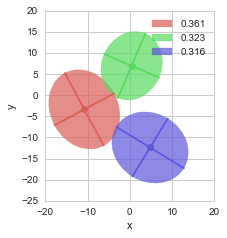

In [43]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax)

In [44]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points))
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x',ylabel='y', colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x',ylabel='y', colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,residual_Z,xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXl0LHd9L/iprVeptV/partX0sUmNjHY+IVkOGAwhwEM
IeGRONgkkyHOZOFBEkImYZhJnOElGBKGLATCyfHhkZDDgAk5HMDv5BEME7PMsAWHF5vtSrpXS6vV
LfVevdT2mz+qf6VfVVdVV2+6ark+5+jcK3X/6lfdXfXpz3fnCCEEIUKECHFOwd/oEwgRIkSIYSIk
uRAhQpxrhCQXIkSIc42Q5EKECHGuEZJciBAhzjVCkgsRIsS5RkhyIUKEONcISS5EiBDnGiHJhQgR
4lwjJLkQIUKca4QkFyJEiHONkORChAhxrhGSXIgQIc41QpILESLEuUZIciFChDjXCEkuRIgQ5xoh
yYUIEeJcIyS5ECFCnGuEJBciRIhzjZDkQoQIca4RklyIECHONUKSCxEixLlGSHIhQoQ41whJLkSI
EOcaIcmFCBHiXEO80ScQ4saDEAJFUaBpGgRBgCRJ4HkeHMfd6FMLEaJvcIQQcqNPIsSNQ7PZRKlU
wvj4OFRVBQCk02lMTU1hfHwcPM+HpBdipBEquacxdF1HvV5HLpdDMpmEpmmQJAmEEBBCoOs6NE2D
oijgOA6CIISkF2LkEJLc0xCEEGiaBl3XwXEcdF3H5uYmdF2HKIowDAO1Wg3RaBSieHKJUNJrNpvg
eR6CIEAQBIiiGJJeiDOL0Fx9msEwDKiqCvqxHxwcIJ/PY3V1FZFIBIqiIJPJgOM4qKoKURSRSCQQ
j8eRSCQgCILtePQ4HMdZZCeKYtvzQoS4UQiV3NME1PzUdR0AoGka9vb2YBgGJEnC+Pg4FEVBLBaD
JEmYmJhAMplEs9lErVZDqVTC4eGhRXqU+Fgy0zQNhBA0m82Q9EKcGYQk9zSAYRjQNA2GYYDjOFQq
Fezv72N6ehqpVAo7Ozu253McB0IIOI5DLBZDLBbD9PQ0CCFoNBqo1+soFovIZDKQJMkiPD/S43kz
W0lVVaRSqZD0QpwaQpI756B+NBpMyGQyKJfLWFlZsZRaUI8Fx3EWmbGkV6vVUCwWcXBwgEgkYjNv
KbkRQlCv15HNZq0ABv03VHohhomQ5M4pnOapoijY3d1FJBLBxsaGFVDoJ1jAkh5gKkaq9AqFAg4O
DhCNRi3Co2uoUnQqvZD0QgwDIcmdQzjN00KhgEwmgwsXLmB6erqN2JxKjpJQt+B53vLXzczMWKRX
q9WQz+fRaDQAAEdHRxY5skovJL0Qw0BIcucMrHlqGAYODg5Qr9extraGWCzW9vxhpn2wpAcAsiwj
m80CAI6Pj9FsNhGLxSylF4vFQtILMXCEJHdOQAjB4eEhEokEotEoGo0Gdnd3kUwmsbGxYZGH11pg
uIQHmKTH8zxmZ2cBmIqzXq+jVqvh6OjIIj3q0wtKepFIJMzRC+GJkOTOAWjuW6FQgCiKqFQqyOVy
WFxcxMTEhO9aN3Lo1VztBOdePM8jmUwimUwCOKnAoFUYiqJYZi1VevQYTtJTFAW6rmNqagqSJIWk
F8JCSHIjDlq5QEHNwY2NDUQikUDHOCv54IIgYGxsDGNjYwBOSK9WqyGbzUJV1TalR8mMBjzi8Tga
jYatIiMkvac3QpIbUThLs6rVKur1OsbHx7GyshL4pvZ63lkgPj/SOzw8hKZpFulRoncqPVVVQ9J7
miMkuREEG1wAgMPDQxQKBcRiMUxOTvZ9A59VAnCSnqZpFulVq1UrZYYqvWg0GpJeiJDkRgnO3DdV
VbG3tweO47CxsYF0Ot31MYflfzsNiKKI8fFxjI+PIxqNol6vY2xszEpO1nXd8uclEglbgIIlPRrI
oMQXkt75QkhyIwJn7lu5XMb+/j5mZ2cxOztrS7IdBEaR+Hiet0gPMJVerVazytBYleckPcMwrAAO
S3qiKEIUxZD0RhghyY0AdF23GloSQnBwcIBKpYJLly5ZOWhAb6qMrVNl/zZqcHvdoigilUohlUoB
MJUvNW+LxSIMw7ApPVbBsaSnqioqlQrm5+dD0htBhCR3huEMLtDct1gshitXroQJsQ50Ih5JkiBJ
ko30qNLL5/MghNiUHiU9qgipectxXKj0RgghyZ1RsOYpAOTzeRweHmJ+fh5TU1MDy29jfVT9HGcU
QVtKTUxMgBBiU3r5fB4AEI/HrUairOJllV5IemcbIcmdQRQKBQiCgGg0CsMwkE6n0Wg0PEuzKJ4u
5DQMcByHSCSCSCRiI71arYZKpYJms4nt7W1XpQeEpHeWEZLcGQI1T4+OjpBKpaDrOnZ3dzE+Pt6x
NKsfnAdyHPT5s6QnSRLy+Tzm5+dRq9UgyzKOjo7A87xFePF43JP0ANjmYwiCEJLeKSIkuTMCNveN
Rk9lWQ5UmkUxKLIaVdIbFnEQQqwa2UgkgsnJSWuMI83Ro33y2EAGq+BC0rtxCEnuBsOZ+6brOmRZ
Bs/zXZVmAb2T06iS2o0Ex3GIRqOIRqOYmpqykV6lUrFIj20V70V6uVwOk5OTSCaTVoeVkPQGh5Dk
biC82pKLoojJycmuCC7E8OBMsXGDG+k1m03U63WUy2VrPgZr3lLSazQaVuRWURQAaJuPEZJe7whJ
7gbBWZqVyWRQLBaxvLyMcrnc00XdjyI7OjpCuVxGLBazRhOGMNGrOqbzMVjScxsKxEbR6edO1b1z
5m1Iet0jvJJPGc7cN1VVsbu7C1EUceXKFatV0mmZnfQGq1QquHDhgq0WtF6v28ytQQQ+hmUWB1Fb
/WAQ9cBeQ4F0XbfmY7BKjyWzkPR6R0hypwineVoqlZBOpzE3N4eZmRnrQu1HkXWzrlarYXd3FxzH
YXV11ZrZQLsK0zpQ2ro8Go1apMc2tAyKUb0Rh0Gg7HyMcrmMhYUFEEI8hwKFpNc7QpI7JbB93wgh
SKfTkGUZly9ftgbBUAw7gEAIwfHxMXK5HJaWlpBOp13LuujNRec1UJXHNrSkpMd2/AjRHdjobdCh
QFRZh6TXGSHJDRlepVnxeBwbGxuupVn9kBz17XhB0zTs7+9D0zQreptOpzuqFa8uvrVaDZlMBpqm
eXb8OA0MMzo8bFPY7fhBhgJRZc0OBWJJT9M0KIqCdDqNpaUlSJL0tCS9kOSGCLawHjCHt2SzWSws
LGBqaspzXRCy8lrnd7NT8zSVSmFlZcUyN3u54N16u9VqNdRqNRQKBasOlC1+HzZG9cYNQqLOoUAs
6XUaCkT9fjTNhVV6kiTZyPE8IiS5IYDmvj355JO4cuUKACCdTkNRFKyvryMajfquH3TemtM8pQXq
zuf04xNkO36wJVF0SA3P84hGo5bCGKXo7Y1Qcp3gRnpuQ4Hi8Xhb5BawK73zTnqjc6WNCJyF9bIs
I5PJIJVKYXl5OZCzfpA+OV3Xsbe3ZzNP3dYNEmxJFFsdQKs4rl27ZqVPsJHEEL3D6U5gSQ8Atra2
rFbxzqFAgDvpCYJg5euNMumFJDdAOHPfaHG9l3rywyBIjpqndO5DkLGE/ezvd17RaBSpVAqyLOPS
pUuWqUUjif1GboeJs6jkOoGSXjweR7FYxPr6ujUJLZvN+k5CA06uZWer+FEkvZDkBgBqnmqaZvUf
29vbAyEEq6urlt8qKPo1VwkhyOfzyGazPY0lHPYFzKZPAHb/knP+qtsN6AYaoRxFDJNE6bG7GQrE
TkJzBjKazSY4jmuryDjLCEmuT3iVZk1PT0PTtJ4ugF4veBqw2N3dDez/Owtw+pfcbsAbHbkdJgkB
w20u4HZsN9KjDUTZ95y+784UIXbmbT6fx+TkJOLxuEWWZ4n4QpLrA87ct0wmg3K5jJWVFSSTyVOt
XAAARVFQqVQ

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARYAAADPCAYAAAAwC/4cAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXtwk2Xa/79t0kA3DSC+bTm2QKFKOfbwgr9dKCPaBZ1l
wa30gFvHnxxcFBTBShfB8jqlBVncXTk5u6yrdgcp4LsjjOPsLuBQgV2kwSAUWjBIONMW7M8kHJIm
z++P+IQkfY7Jk/P1mckMyfPcT+6W5pPrvu77ua8EhmEYEARBKEhiuDtAEETsQWIhCEJxSCwEQSgO
iYUgCMUhsRAEoTgkFoIgFEcd7g74g16vD3cXCMJNfn6+5HO/NuyH09GH97hGo8GYMWOU6FZYiUqx
AMDOmsagXdtsMUOXogva9SMF+jkDp2RloazznY4+SM+o4z1+4+JvA+1SREBDIYIgFIfEQhCE4pBY
CIJQHBILQRCKQ2IhCEJxSCwEQSgOiYUgCMWJ2nUsBBFvOJ1OrF69Gq2trdBoNKipqUFmZqb7+IED
B7B582ao1WoUFxejpKREtE1tbS2GDh2K8vJyAMAHH3yAzz77DAAwZcoULFq0CAzDoLCwEEOGDAEA
jB8/HsuWLRPsK4mFIKKEffv2wWazoaGhAQaDAWvXrsXWrVsBAHa7HXV1ddi9ezeSk5NRXl6OqVOn
4vjx45xtbt26hddffx0XLlzA3LlzAQCXLl3Cnj17sGvXLiQmJqK8vByPP/44kpOTMWrUKLz33nuS
+0pDIYKIEvR6PSZPngzAFTWcOnXKfcxoNCIjIwO9e/eGRqNBfn4+jh07xtvGarVi8eLFmDlzpvsa
/fr1w7Zt26BSqZCQkICuri706NEDzc3NuHHjBioqKjB//nycP39etK8kFoKIEiwWC1JSUtzPVSoV
urq63Md0uvu3LWi1WlgsFt42gwcPxrhx47yun5SUhL59+4JhGKxbtw45OTkYOnQoUlNTsWDBAtTX
1+OFF15AZWWlaF9pKEQQUUJKSgqsVqv7udPphFqt5jxmtVqh0+kE23Bx7949rFixAlqtFtXV1QCA
0aNHQ6VSAQAKCgrQ1tYGhmGQkJDAex2KWAgiSsjLy0Njo+vmW4PBgOzsbPexrKwsmEwmdHZ2wmaz
oampCbm5uYJtfGEYBi+++CIeeughvPXWW26ZbNq0CR9++CEAoKWlBf379xeUCkARC0FEDUVFRTh8
+DDKysrAMAxqa2uxd+9e3L59G6WlpaiqqsLcuXPBMAyKi4uRnp7O2YaPffv24auvvoLNZsOXX34J
AFi6dCkWLFiAyspKHDx4ECqVCnV1/HdnsyREY/kPvV5P2yYoAP2cgVOyslDWfix6vV502wQ514tU
KGIhiBDTfvfbcHch6JBYCMmcvXVH1vnZfZOD1JPo5jzzGO+xIaHrRlAhsRCccEkka8xgye2NJy/h
7K07JJc4JaRisdvtWLFiBa5cuQKbzYaFCxdi+PDhqKqqQkJCAkaMGIHq6mokJtJkVSi4fCcBKht/
FCJHJHxtz568BICil3gjpGLZs2cP+vTpg/Xr16OzsxOzZs3Cww8/jCVLlmDixIl48803sX//fhQV
FYWyWzGB3GEKAPTPetBrUVUwyBozGMYf5ULEDyEVy/Tp0zFt2jQArjlzlUqF5uZmTJgwAQBQWFiI
w4cPk1gE4BOIP9GF2WwOtDuSoWFRfBFSsWi1WgCu5ccvv/wylixZgnXr1rkX22i1Wsl/7GZLcD8U
wb6+HC7fub8YqX/Wg5zn+CuJUMglbUgfXDPexJl2CwYlh2d1QyT9f8YDIU/eXrt2DS+99BLmzJmD
GTNmYP369e5jVqsVvXr1knSdYK6/iIT1HZ6RSfZ4/3MdQpjN5qAPhVh043UwnrwEXUroo5ZI+P+M
N0KaJe3o6MDzzz+PyspKPP300wCAnJwcHD16FADQ2NiIgoKCUHYpImGlkjVmcEAJ1EjEn1wQEX2E
VCzvvfcefvjhB2zZsgUVFRWoqKjAkiVLsHHjRpSWlsJut7tzMPHI2Vt3vKQSa8Tiz0RwE9Kh0MqV
K7Fy5cpur//tb38LZTcikkgWyknz917Px+geCFNPiGiBFshFAOGQyknz9+hyOKA2d4memzWin3fb
c9e9nssRTdaYwTh78hLNEMU4JJYwE2yp+EYbngwY2Muv5K2naIznrrvfgyIZgoXEEiaCIRQuifhG
G54oMdXMXp8VDMmFAEgsYUEpqfiKREgiwSZrRD+SC+GGxBJiApVKJMnEF1YuBEFiCSGBSMVTKErJ
5Bxjhcp6V1abcdpUweNZI/rh5LnrolELLfGPbUgsIcJfqSgllBPW9m6vDUpLkb0i9YSpzf1vIckI
DYnoxsTYh8QSZMIlFC6RZGemeT335/4Z9hpnTW04YW3nlAsNiYQ5b7nMe2xI6LoRVEgsQSRQqcgV
iq9MfEWiJNmZaYJyIfjpdPw03F0IOiSWIBEqqYRSJr6QXAg+SCwK43mTnRypBCIUf2VyVm2Gyn5b
8vnjk9K7vcbKxRepSVwiNiGxKEgoopRAhGKw3+j22sgB0q5x5mobDPYbnHIhQoPT6cTq1avR2toK
jUaDmpoaZGZmuo8fOHAAmzdvhlqtRnFxMUpKSkTb1NbWYujQoSgvLwcA7Ny5Ezt27IBarcbChQvx
6KOP4u7du6isrMTNmzeh1Wqxbt069O3bV7CvtLmsQoRSKtmZaZKkYrDf8HoALpGwj8w+KSJXuA8r
IC45ZWemcSaLCWXZt28fbDYbGhoasGzZMqxdu9Z9zG63o66uDu+//z7q6+vR0NCAjo4O3ja3bt3C
vHnzcODAAfc12tvbUV9fjx07duAvf/kL3nnnHdhsNnz88cfIzs7G9u3bMWvWLGzZskW0rxSxBIi/
Qx9AulTkRimeH36pEYkURg5Io8gljOj1ekyePBkAMH78eJw6dcp9zGg0IiMjA7179wYA5Ofn49ix
YzAYDJxtrFYrFi9e7C6/CgDffPMNcnNzodFooNFokJGRgZaWFuj1esybNw+Aa/tYEkuQCcVUsmeU
IkSwZOKLUnKhu5zlY7FYkJJyP8pUqVTo6uqCWq2GxWLxuqFUq9XCYrHwthk8eDAGDx7sJRaha7Cv
S90+lsQik0AiFMD/oQ8fSgullbkIAHgoIYP3HFYuvvjODlECV1lSUlJgtVrdz51OJ9RqNecxq9UK
nU4n2Ebs+lzXkLp9LOVYJOK7u1swpXLC2o4T1nbRXIpv3kQqrcxFtDIXcbFnh/vf7CMnNc3rHFY0
Yvg9M0VbVUomLy/PHWEYDAZkZ2e7j2VlZcFkMqGzsxM2mw1NTU3Izc0VbOPL2LFjodfrce/ePZjN
ZhiNRmRnZyMvLw8HDx4E4No+VkptaYpYRFDiTmSlhz6eQpEClxxyUtN4N9Nm5QIAp9vb0Mpc5Ixg
lBgO0dJ+6RQVFeHw4cMoKysDwzCora3F3r17cfv2bZSWlqKqqgpz584FwzAoLi5Geno6Zxs+UlNT
UVFRgTlz5oBhGLz66qvo0aMHysvLsXz5cpSXlyMpKQkbNmwQ7WsCwzDhqccQAHq9HjtrGsVP9BOz
xYxrNpdzldraQOmhjxSpeArFUxYsUnfpP93uGvb4yuXM1TYvsZw1tXVbKGcUGQoZQ1ApMZi79Jes
LJT0Dc6i1+vxv5pDvMd/ZZsk63qRCkUsHFy+kwCVKnRSUVIoYjLxh5zUNMHIxROuVbh0Q2L8QWLx
gB32BFp6VOlpZClSCYZQPGHlwtU3NmrhWoUr9YZE2kYhtghL8vbEiROoqKgAAJhMJpSXl2POnDmo
rq6G0+kMR5cU39VNTpTCJxXfhW18sFLJSU0LilS43kusT3JwF5CnRG7MEPKI5c9//jP27NmD5GTX
t1NdXV3Yi8I

## Goodness-of-fit Statistics

In [45]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points))
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.975  0.013      0.022  2.748434e-09      0.041       0.175

# 5. GMM by Optimization

In [46]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print(FIT_METHOD)

square_error


In [47]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

     fun: -19.987544785098965
     jac: array([  2.01223302e+00,   0.00000000e+00,   0.00000000e+00,
        -2.38418579e-07,   0.00000000e+00,  -7.15255737e-07,
         2.01223254e+00,  -2.38418579e-07,   0.00000000e+00,
        -2.38418579e-07,   0.00000000e+00,  -2.38418579e-07,
         2.01223350e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -4.76837158e-07,
         0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 1535
     nit: 76
    njev: 76
  status: 0
 success: True
       x: array([  0.68052384,  -6.24639321,  -4.32945105,   9.84567528,
        10.26461815,  -0.20609704,   0.19956009,   2.12343314,
         9.02201496,   6.65369794,   6.80467043,  -0.11314897,
         0.11991607,  10.26350696, -12.97225617,   7.03019092,
         6.42068664,  -0.32254975])

## 5.1 GMM Result

In [48]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

weight  mean_x   mean_y  sig_x   sig_y    corr
1  0.681  -6.246   -4.329  9.846  10.265  -0.206
2  0.200   2.123    9.022  6.654   6.805  -0.113
3  0.120  10.264  -12.972  7.030   6.421  -0.323

GMM Plot Result
0.680523842962 [[-6.24639321 -4.32945105]] [  8.9386541   11.06346105] -140.716849214
0.199560089324 [[ 2.12343314  9.02201496]] [ 6.32968397  7.10706246] -140.608333676
0.119916067714 [[ 10.26350696 -12.97225617]] [ 5.49535122  7.77495443] -127.137776837


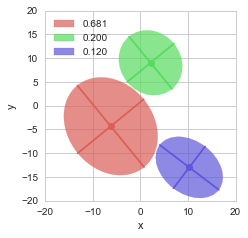

In [49]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm,ax=ax)

## 5.2 Goodness-of-fit statistics

In [50]:
gof_df(gmm_pdf_result, kde_result)

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.981  0.015      0.058  2.086986e-09      0.035       0.152

In [51]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x',ylabel='y')
fig_gmm = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x',ylabel='y')
fig = plt.figure(figsize=(4,3))
plot_2d_prob_density(X,Y,residual_Z,xlabel='x',ylabel='y')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATkAAAE5CAYAAADr4VfxAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmQJFl9Jvj5FWfeR2VWXlWZWU2jLkB00SuQ9XA11gK1
erQgGEQjaWWyZkBihSSETGKZET3LSjRIDNIsC0KzLQwJDOMQsxjHmAxxjBoaGy7ROpqjqawjIzMy
MiIz4/Q4/Hr7h8fzfO7h7uFxeFZGtn9mbV1VEe89jwiPL77fzRFCCCJEiBDhjIK/1RcQIUKECGEi
IrkIESKcaUQkFyFChDONiOQiRIhwphGRXIQIEc40IpKLECHCmUZEchEiRDjTiEguQoQIZxoRyUWI
EOFMIyK5CBEinGlEJBchQoQzjYjkIkSIcKYRkVyECBHONCKSixAhwplGRHIRIkQ404hILkKECGca
EclFiBDhTCMiuQgRIpxpRCQXIUKEM42I5CJEiHCmEZFchAgRzjQikosQIcKZRkRyESJEONOISC5C
hAhnGhHJRYgQ4UxDvNUXEOHWgxACRVGgaRoEQYAkSeB5HhzH3epLixBhYHCEEHKrLyLCrUOr1UK5
XMb4+DhUVQUAZLNZTE9PY3x8HDzPR6QXYaQRKbmnMHRdR6PRQKFQQDqdhqZpkCQJhBAQQqDrOjRN
g6Io4DgOgiBEpBdh5BCR3FMQhBBomgZd18FxHHRdx9bWFnRdhyiKMAwD9Xod8Xgconh8i1DSa7Va
4HkegiBAEASIohiRXoRTi8hcfYrBMAyoqgr6se/t7eHo6Ahra2uIxWJQFAW5XA4cx0FVVYiiiFQq
hWQyiVQqBUEQbPvRfTiOs8hOFMWO50WIcKsQKbmnCKj5qes6AEDTNOzs7MAwDEiShPHxcSiKgkQi
AUmSMDk5iXQ6jVarhXq9jnK5jP39fYv0KPGxZKZpGgghaLVaEelFODWISO4pAMMwoGkaDMMAx3Go
VqvY3d3FzMwMJiYmsL29bXs+x3EghIDjOCQSCSQSCczMzIAQgmaziUajgVKphFwuB0mSLMLzIz2e
N7OVVFXFxMRERHoRTgwRyZ1xUD8aDSbkcjlUKhWsrq5aSi2ox4LjOIvMWNKr1+solUrY29tDLBaz
mbeU3AghaDQayOfzVgCD/j9SehHCRERyZxRO81RRFGQyGcRiMWxubloBhUGCBSzpAaZipEqvWCxi
b28P8XjcIjy6hipFp9KLSC9CGIhI7gzCaZ4Wi0XkcjmcO3cOMzMzHcTmVHKUhHoFz/OWv252dtYi
vXq9jqOjIzSbTQDAwcGBRY6s0otIL0IYiEjujIE1Tw3DwN7eHhqNBtbX15FIJDqeH2baB0t6ACDL
MvL5PADg8PAQrVYLiUTCUnqJRCIivQhDR0RyZwSEEOzv7yOVSiEej6PZbCKTySCdTmNzc9MiD6+1
QLiEB5ikx/M85ubmAJiKs9FooF6v4+DgwCI96tMLSnqxWCzK0YvgiYjkzgBo7luxWIQoiqhWqygU
ClhaWsLk5KTvWjdy6Ndc7QbnWTzPI51OI51OAziuwKBVGIqiWGYtVXp0DyfpKYoCXdcxPT0NSZIi
0otgISK5EQetXKCg5uDm5iZisVigPU5LPrggCBgbG8PY2BiAY9Kr1+vI5/NQVbVD6VEyowGPZDKJ
ZrNpq8iISO+pjYjkRhTO0qxarYZGo4Hx8XGsrq4G/lJ7Pe80EJ8f6e3v70PTNIv0KNE7lZ6qqhHp
PcURkdwIgg0uAMD+/j6KxSISiQSmpqYG/gKfVgJwkp6maRbp1Wo1K2WGKr14PB6RXoSI5EYJztw3
VVWxs7MDjuOwubmJbDbb855h+d9OAqIoYnx8HOPj44jH42g0GhgbG7OSk3Vdt/x5qVTKFqBgSY8G
MijxRaR3thCR3IjAmftWqVSwu7uLubk5zM3N2ZJsh4FRJD6e5y3SA0ylV6/XrTI0VuU5Sc8wDCuA
w5KeKIoQRTEivRFGRHIjAF3XrYaWhBDs7e2hWq3iwoULVg4a0J8qY+tU2X8bNbi9blEUMTExgYmJ
CQCm8qXmbalUgmEYNqXHKjiW9FRVRbVaxcLCQkR6I4iI5E4xnMEFmvuWSCRw6dKlKCHWgW7EI0kS
JEmykR5VekdHRyCE2JQeJT2qCKl5y3FcpPRGCBHJnVKw5ikAHB0dYX9/HwsLC5ienh5afhvroxpk
n1EEbSk1OTkJQohN6R0dHQEAksmk1UiUVbys0otI73QjIrlTiGKxCEEQEI/HYRgGstksms2mZ2kW
xVOFnMIAx3GIxWKIxWI20qvX66hWq2i1Wrh+/bqr0gMi0jvNiEjuFIGapwcHB5iYmICu68hkMhgf
H+9amjUIzgI5Dvv6WdKTJAlHR0dYWFhAvV6HLMs4ODgAz/MW4SWTSU/SA2CbjyEIQkR6J4iI5E4J
2Nw3Gj2VZTlQaRbFsMhqVEkvLOIghFg1srFYDFNTU9YYR5qjR/vksYEMVsFFpHfrEJHcLYYz903X
dciyDJ7neyrNAvonp1EltVsJjuMQj8cRj8cxPT1tI71qtWqRHtsq3ov0CoUCpqamkE6nrQ4rEekN
DxHJ3UJ4tSUXRRFTU1M9EVyE8OBMsXGDG+m1Wi00Gg1UKhVrPgZr3lLSazabVuRWURQA6JiPEZFe
/4hI7hbBWZqVy+VQKpWwsrKCSqXS1009iCI7ODhApVJBIpGwRhNGMNGvOqbzMVjScxsKxEbR6edO
1b1z5m1Eer0jupNPGM7cN1VVkclkIIoiLl26ZLVKOimzk37BqtUqzp07Z6sFbTQaNnNrGIGPsMzi
IGprEAyjHthrKJCu69Z8DFbpsWQWkV7/iEjuBOE0T8vlMrLZLObn5zE7O2vdqIMosl7W1et1ZDIZ
cByHtbU1a2YD7SpM60Bp6/J4PG6RHtvQMihG9YsYBoGy8zEqlQoWFxdBCPEcChSRXv+ISO6EwPZ9
I4Qgm81ClmVcvHjRGgRDEXYAgRCCw8NDFAoFLC8vI5vNupZ10S8XnddAVR7b0JKSHtvxI0JvYKO3
QYcCUWUdkV53RCQXMrxKs5LJJDY3N11LswYhOerb8YKmadjd3YWmaVb0NpvNdlUrXl186/U6crkc
NE3z7PhxEggzOhy2Key2f5ChQFRZs0OBWNLTNA2KoiCbzWJ5eRmSJD0lSS8iuRDBFtYD5vCWfD6P
xcVFTE9Pe64LQlZe6/y+7NQ8nZiYwOrqqmVu9nPDu/V2q9frqNfrKBaLVh0oW/weNkb1ixuERJ1D
gVjS6zYUiPr9aJoLq/QkSbKR41lERHIhgOa+PfHEE7h06RIAIJvNQlEUbGxsIB6P+64fdt6a0zyl
BerO5wziE2Q7frAlUXRIDc/ziMfjlsIYpejtrVBy3eBGem5DgZLJZEfkFrArvbNOeqNzp40InIX1
siwjl8thYmICKysrgZz1w/TJ6bqOnZ0dm3nqtm6YYEui2OoAWsVx48YNK32CjSRG6B9OdwJLegBw
7do1q1W8cygQ4E56giBY+XqjTHoRyQ0Rztw3WlzvpZ78MAySo+YpnfsQZCzhIOf7XVc8HsfExARk
WcaFCxcsU4tGEgeN3IaJ06jkuoGSXjKZRKlUwsbGhjUJLZ/P+05CA47vZWer+FEkvYjkhgBqnmqa
ZvUf29nZASEEa2trlt8qKAY1VwkhODo6Qj6f72ssYdg3MJs+Adj9S875q25fQDfQCOUoIkwSpXv3
MhSInYTmDGS0Wi1wHNdRkXGaEZHcgPAqzZqZmYGmaX3dAP3e8DRgkclkAvv/TgOc/iW3L+CtjtyG
SUJAuM0F3PZ2Iz3aQJR9z+n77kwRYmfeHh0dYWpqCslk0iLL00R8EckNAGfuWy6XQ6VSwerqKtLp
9IlWLgCAoii

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARYAAADPCAYAAAAwC/4cAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJztnXtwk2Xa/79t0kA3DSC+bTm2QKFKOfbwgr9dKCPaBZ1l
wa30gFvHnxxcFBTBShfB8jqlBVncXTk5u6yrdgcp4LsjjOPsLuBQgV2kwSAUWjBIONMW7M8kHJIm
z++P+IQkfY7Jk/P1mckMyfPcT+6W5pPrvu77ua8EhmEYEARBKEhiuDtAEETsQWIhCEJxSCwEQSgO
iYUgCMUhsRAEoTgkFoIgFEcd7g74g16vD3cXCMJNfn6+5HO/NuyH09GH97hGo8GYMWOU6FZYiUqx
AMDOmsagXdtsMUOXogva9SMF+jkDp2RloazznY4+SM+o4z1+4+JvA+1SREBDIYIgFIfEQhCE4pBY
CIJQHBILQRCKQ2IhCEJxSCwEQSgOiYUgCMWJ2nUsBBFvOJ1OrF69Gq2trdBoNKipqUFmZqb7+IED
B7B582ao1WoUFxejpKREtE1tbS2GDh2K8vJyAMAHH3yAzz77DAAwZcoULFq0CAzDoLCwEEOGDAEA
jB8/HsuWLRPsK4mFIKKEffv2wWazoaGhAQaDAWvXrsXWrVsBAHa7HXV1ddi9ezeSk5NRXl6OqVOn
4vjx45xtbt26hddffx0XLlzA3LlzAQCXLl3Cnj17sGvXLiQmJqK8vByPP/44kpOTMWrUKLz33nuS
+0pDIYKIEvR6PSZPngzAFTWcOnXKfcxoNCIjIwO9e/eGRqNBfn4+jh07xtvGarVi8eLFmDlzpvsa
/fr1w7Zt26BSqZCQkICuri706NEDzc3NuHHjBioqKjB//nycP39etK8kFoKIEiwWC1JSUtzPVSoV
urq63Md0uvu3LWi1WlgsFt42gwcPxrhx47yun5SUhL59+4JhGKxbtw45OTkYOnQoUlNTsWDBAtTX
1+OFF15AZWWlaF9pKEQQUUJKSgqsVqv7udPphFqt5jxmtVqh0+kE23Bx7949rFixAlqtFtXV1QCA
0aNHQ6VSAQAKCgrQ1tYGhmGQkJDAex2KWAgiSsjLy0Njo+vmW4PBgOzsbPexrKwsmEwmdHZ2wmaz
oampCbm5uYJtfGEYBi+++CIeeughvPXWW26ZbNq0CR9++CEAoKWlBf379xeUCkARC0FEDUVFRTh8
+DDKysrAMAxqa2uxd+9e3L59G6WlpaiqqsLcuXPBMAyKi4uRnp7O2YaPffv24auvvoLNZsOXX34J
AFi6dCkWLFiAyspKHDx4ECqVCnV1/HdnsyREY/kPvV5P2yYoAP2cgVOyslDWfix6vV502wQ514tU
KGIhiBDTfvfbcHch6JBYCMmcvXVH1vnZfZOD1JPo5jzzGO+xIaHrRlAhsRCccEkka8xgye2NJy/h
7K07JJc4JaRisdvtWLFiBa5cuQKbzYaFCxdi+PDhqKqqQkJCAkaMGIHq6mokJtJkVSi4fCcBKht/
FCJHJHxtz568BICil3gjpGLZs2cP+vTpg/Xr16OzsxOzZs3Cww8/jCVLlmDixIl48803sX//fhQV
FYWyWzGB3GEKAPTPetBrUVUwyBozGMYf5ULEDyEVy/Tp0zFt2jQArjlzlUqF5uZmTJgwAQBQWFiI
w4cPk1gE4BOIP9GF2WwOtDuSoWFRfBFSsWi1WgCu5ccvv/wylixZgnXr1rkX22i1Wsl/7GZLcD8U
wb6+HC7fub8YqX/Wg5zn+CuJUMglbUgfXDPexJl2CwYlh2d1QyT9f8YDIU/eXrt2DS+99BLmzJmD
GTNmYP369e5jVqsVvXr1knSdYK6/iIT1HZ6RSfZ4/3MdQpjN5qAPhVh043UwnrwEXUroo5ZI+P+M
N0KaJe3o6MDzzz+PyspKPP300wCAnJwcHD16FADQ2NiIgoKCUHYpImGlkjVmcEAJ1EjEn1wQEX2E
VCzvvfcefvjhB2zZsgUVFRWoqKjAkiVLsHHjRpSWlsJut7tzMPHI2Vt3vKQSa8Tiz0RwE9Kh0MqV
K7Fy5cpur//tb38LZTcikkgWyknz917Px+geCFNPiGiBFshFAOGQyknz9+hyOKA2d4memzWin3fb
c9e9nssRTdaYwTh78hLNEMU4JJYwE2yp+EYbngwY2Muv5K2naIznrrvfgyIZgoXEEiaCIRQuifhG
G54oMdXMXp8VDMmFAEgsYUEpqfiKREgiwSZrRD+SC+GGxBJiApVKJMnEF1YuBEFiCSGBSMVTKErJ
5Bxjhcp6V1abcdpUweNZI/rh5LnrolELLfGPbUgsIcJfqSgllBPW9m6vDUpLkb0i9YSpzf1vIckI
DYnoxsTYh8QSZMIlFC6RZGemeT335/4Z9hpnTW04YW3nlAsNiYQ5b7nMe2xI6LoRVEgsQSRQqcgV
iq9MfEWiJNmZaYJyIfjpdPw03F0IOiSWIBEqqYRSJr6QXAg+SCwK43mTnRypBCIUf2VyVm2Gyn5b
8vnjk9K7vcbKxRepSVwiNiGxKEgoopRAhGKw3+j22sgB0q5x5mobDPYbnHIhQoPT6cTq1avR2toK
jUaDmpoaZGZmuo8fOHAAmzdvhlqtRnFxMUpKSkTb1NbWYujQoSgvLwcA7Ny5Ezt27IBarcbChQvx
6KOP4u7du6isrMTNmzeh1Wqxbt069O3bV7CvtLmsQoRSKtmZaZKkYrDf8HoALpGwj8w+KSJXuA8r
IC45ZWemcSaLCWXZt28fbDYbGhoasGzZMqxdu9Z9zG63o66uDu+//z7q6+vR0NCAjo4O3ja3bt3C
vHnzcODAAfc12tvbUV9fjx07duAvf/kL3nnnHdhsNnz88cfIzs7G9u3bMWvWLGzZskW0rxSxBIi/
Qx9AulTkRimeH36pEYkURg5Io8gljOj1ekyePBkAMH78eJw6dcp9zGg0IiMjA7179wYA5Ofn49ix
YzAYDJxtrFYrFi9e7C6/CgDffPMNcnNzodFooNFokJGRgZaWFuj1esybNw+Aa/tYEkuQCcVUsmeU
IkSwZOKLUnKhu5zlY7FYkJJyP8pUqVTo6uqCWq2GxWLxuqFUq9XCYrHwthk8eDAGDx7sJRaha7Cv
S90+lsQik0AiFMD/oQ8fSgullbkIAHgoIYP3HFYuvvjODlECV1lSUlJgtVrdz51OJ9RqNecxq9UK
nU4n2Ebs+lzXkLp9LOVYJOK7u1swpXLC2o4T1nbRXIpv3kQqrcxFtDIXcbFnh/vf7CMnNc3rHFY0
Yvg9M0VbVUomLy/PHWEYDAZkZ2e7j2VlZcFkMqGzsxM2mw1NTU3Izc0VbOPL2LFjodfrce/ePZjN
ZhiNRmRnZyMvLw8HDx4E4No+VkptaYpYRFDiTmSlhz6eQpEClxxyUtN4N9Nm5QIAp9vb0Mpc5Ixg
lBgO0dJ+6RQVFeHw4cMoKysDwzCora3F3r17cfv2bZSWlqKqqgpz584FwzAoLi5Geno6Zxs+UlNT
UVFRgTlz5oBhGLz66qvo0aMHysvLsXz5cpSXlyMpKQkbNmwQ7WsCwzDhqccQAHq9HjtrGsVP9BOz
xYxrNpdzldraQOmhjxSpeArFUxYsUnfpP93uGvb4yuXM1TYvsZw1tXVbKGcUGQoZQ1ApMZi79Jes
LJT0Dc6i1+vxv5pDvMd/ZZsk63qRCkUsHFy+kwCVKnRSUVIoYjLxh5zUNMHIxROuVbh0Q2L8QWLx
gB32BFp6VOlpZClSCYZQPGHlwtU3NmrhWoUr9YZE2kYhtghL8vbEiROoqKgAAJhMJpSXl2POnDmo
rq6G0+kMR5cU39VNTpTCJxXfhW18sFLJSU0LilS43kusT3JwF5CnRG7MEPKI5c9//jP27NmD5GTX
t1NdXV3Yi8I

In [52]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: divide by zero encountered in log


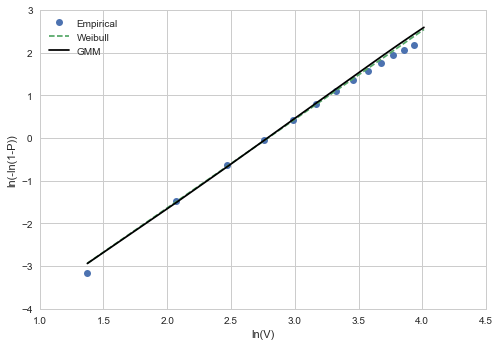

In [53]:
x = linspace(0, max_speed, 15)

# 1. Plot v-p points, empirical distribution
ecdf = sm.distributions.ECDF(df.speed)
y = ecdf(x)
plot(log(x), log(-log(1-y)),'o', label = 'Empirical')

# 2. Weibull distribution
weibull_params = sp.stats.weibull_min.fit(df.speed, loc=0)
y_cdf_weibull = sp.stats.weibull_min.cdf(x, *weibull_params)
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')

# 3. GMM distribution
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y = array(list(zip(*y_))[0])
plot(log(x), log(-log(1-y)),'-', color='black', label = 'GMM')

plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'})

Direction Distribution Comparison


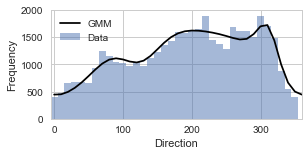

In [54]:
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]
y = array(list(zip(*y_))[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5, label='Data')
plot(x/pi*180, y,'-', color='black', label='GMM')
title='Direction Distribution Comparison'
plt_configure(xlabel='Direction',ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4.5,2))
dir_fig = plt.gcf()
print(title)

Speed Distribution Comparison


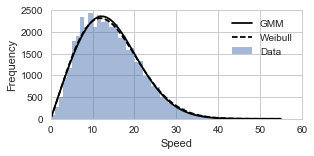

In [55]:
# Calculate Speed Distribution
# 1. GMM Model
x = arange(0, max_speed, 0.5)
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y = array(list(zip(*y_))[0])*len(df.speed)/0.02
plot(x, y,'-', color='black', label='GMM')

# 2. Observation
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data')

# 3. Weibull
y_weibul = sp.stats.weibull_min.pdf(x, *weibull_params)* len(df.speed)
plot(x, y_weibul, '--', color='black', label='Weibull')   

title='Speed Distribution Comparison'
plt_configure(xlabel='Speed',ylabel='Frequency',legend=True, figsize=(4.5, 2))
plt.gca().set_ylim(bottom = 0)
plt.locator_params(axis='y', nbins=5)
print(title)

In [56]:
# %%time
incre = max(SECTOR_LENGTH, 10)
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre) 
                                        for angle in arange(0, 360, incre))  
# This R square is computed as in paper 
# Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(density_collection))

0.899857826278


## 5.3 Sectoral Comaprison

In [57]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    max_diff_array = []
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = radians(angle), radians(incre)  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        direction_prob = integrate.nquad(f, [[0, inf],
                                             [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
        weibull_params = sp.stats.weibull_min.fit(sub_df.speed, loc=0)
        
        fig = plt.figure(figsize=(13,1.3))
        x = linspace(0, sub_max_speed, 20)
        # 1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        # 1.1. Data Histogram
        sub_df['speed'].hist(bins=arange(0, sub_max_speed), alpha=0.5, label='Data')             
        # 1.2. Model Distribution
        y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], 
                                     [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                                 for x_ in x]
        y_gmm = array(list(zip(*y_gmm_))[0])/direction_prob[0]/0.02
        plot(x, y_gmm*data_size,'-', color='black', label='GMM')
        # 1.3 Weibull Distribution
        y_weibull = sp.stats.weibull_min.pdf(x, *weibull_params)
        plot(x, y_weibull*data_size, '--', color='black',label='Weibull')   
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        # 2.1. Empirical distribution
        ecdf = sm.distributions.ECDF(sub_df.speed)
        y_ecdf = ecdf(x)
        # 2.2. Model
        y_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
             for x_val in x]
        y_cdf_gmm = array(list(zip(*y_))[0])/direction_prob[0]
        # 2.3 Weibull
        y_cdf_weibull = sp.stats.weibull_min.cdf(x, *weibull_params)      
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        plt.gca().set_xlim(right = max_speed)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        # 3. Weibull Comparison
        ax3 = fig.add_subplot(1,3,3)
        plot(log(x), log(-log(1-y_ecdf)),'o', alpha=0.8, label='Data')
        plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label='GMM')
        plot(log(x), log(-log(1-y_cdf_weibull)),'--',color='black',label='Weibull')
        plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
        plt.gca().set_xlim(right = log(max_speed+1))
        
        print('%s (%s - %s) degree' % (angle, start_angle, end_angle)     )

        bins = arange(0, sub_df.speed.max()+1)
        density, _ = np.histogram(sub_df['speed'],bins=bins, normed=True)
        density_expected_ =[integrate.nquad(f, [[x_, x_+1],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                    for x_ in bins[:-1]]
        density_expected_gmm = array(list(zip(*density_expected_ ))[0])/direction_prob[0]
        R_square_gmm = sector_r_square(density, density_expected_gmm)
        
        density_expected_weibull = sp.stats.weibull_min.cdf(bins[1:], *weibull_params) - sp.stats.weibull_min.cdf(bins[:-1], *weibull_params) 
        R_square_weibull = sector_r_square(density, density_expected_weibull)

        diff, diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
        max_diff_array.append([len(sub_df), angle, diff.max(), x[diff.argmax()], 
                               diff_weibull.max(), x[diff_weibull.argmax()], R_square_gmm, R_square_weibull])
        curves = {'angle': angle, 'data_size': data_size, 'weight': direction_prob[0], 
                  'x': x, 'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf}
        curve_collection.append(curves)
        
        plt.show()
        print('data size:', len(sub_df), 'weight', len(sub_df)/len(df))
        print('GMM', 'Weibull')
        print('R square', R_square_gmm,  R_square_weibull)
        print('max diff:', diff.max(), diff_weibull.max(), 'speed value:', x[diff.argmax()], 'y gmm', y_cdf_gmm[diff.argmax()])
        print(' ')
    return max_diff_array, curve_collection

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:60: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:61: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:62: RuntimeWarning: divide by zero encountered in log


5.0 (-5.0 - 15.0) degree


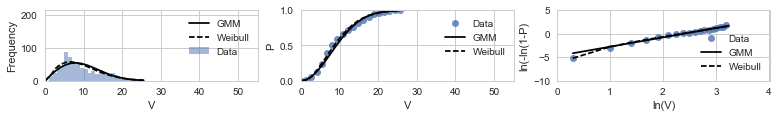

data size: 705 weight 0.01645773513551369
GMM Weibull
R square 0.750018529033 0.83419287486
max diff: 0.0854358144927 0.0398274897718 speed value: 8.0723301731 y gmm 0.416691845082
 
25.0 (15.0 - 35.0) degree


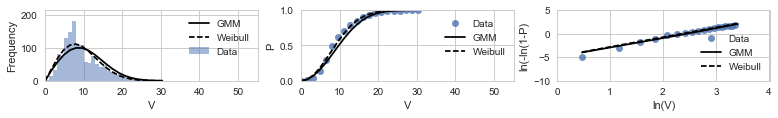

data size: 1348 weight 0.03146812335130845
GMM Weibull
R square 0.755994516617 0.837482691118
max diff: 0.132248931969 0.0639575233771 speed value: 9.59337957295 y gmm 0.488670949337
 
45.0 (35.0 - 55.0) degree


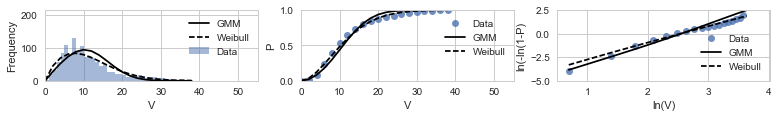

data size: 1339 weight 0.031258024604897634
GMM Weibull
R square 0.790888496005 0.875230006325
max diff: 0.0964201988933 0.0496984497752 speed value: 9.9931619344 y gmm 0.437560383631
 
65.0 (55.0 - 75.0) degree


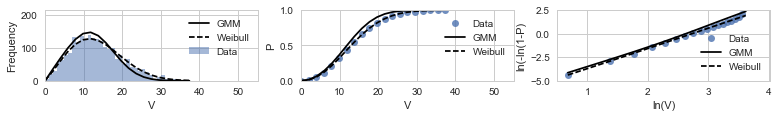

data size: 2180 weight 0.05089058524173028
GMM Weibull
R square 0.927718436262 0.973207071981
max diff: 0.0845975806869 0.0103689844899 speed value: 19.683237794 y gmm 0.901111342155
 
85.0 (75.0 - 95.0) degree


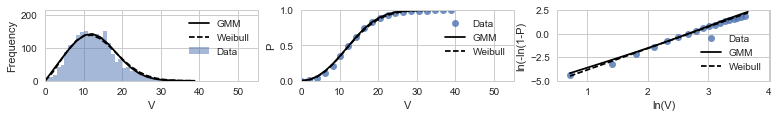

data size: 2183 weight 0.05096061815720055
GMM Weibull
R square 0.961547290415 0.960653418601
max diff: 0.0268553904488 0.0272538410299 speed value: 6.11466536837 y gmm 0.134505413353
 
105.0 (95.0 - 115.0) degree


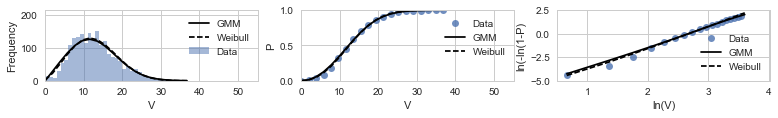

data size: 1983 weight 0.046291757125849146
GMM Weibull
R square 0.935262071338 0.943920346083
max diff: 0.0422251475301 0.028509088084 speed value: 5.80650461291 y gmm 0.126440982124
 
125.0 (115.0 - 135.0) degree


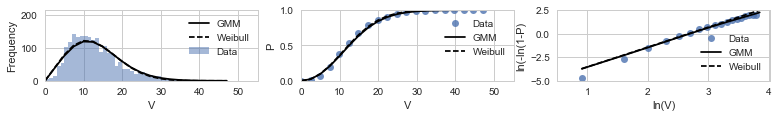

data size: 2007 weight 0.046852020449611315
GMM Weibull
R square 0.940416250272 0.946098287143
max diff: 0.0412774874603 0.0351796001461 speed value: 12.3938219323 y gmm 0.496340848364
 
145.0 (135.0 - 155.0) degree


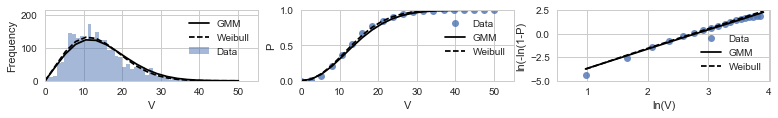

data size: 2353 weight 0.054929150033849246
GMM Weibull
R square 0.92074262096 0.940542767058
max diff: 0.066654203632 0.0309252091281 speed value: 15.8218928783 y gmm 0.608653913665
 
165.0 (155.0 - 175.0) degree


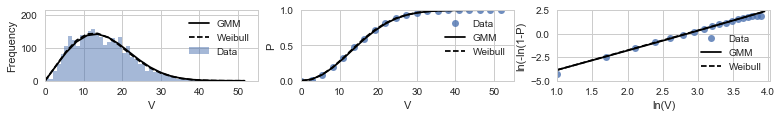

data size: 2785 weight 0.06501388986156827
GMM Weibull
R square 0.963393675218 0.966373373252
max diff: 0.0226499837627 0.0093960624607 speed value: 13.6047921462 y gmm 0.450958633832
 
185.0 (175.0 - 195.0) degree


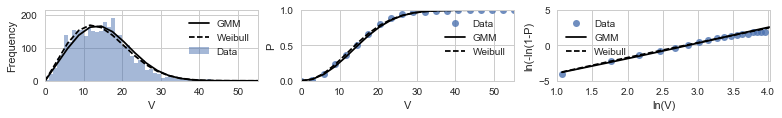

data size: 3167 weight 0.07393141443144945
GMM Weibull
R square 0.958856822549 0.96243501947
max diff: 0.0347638224918 0.0184323294781 speed value: 20.3700309613 y gmm 0.764415211294
 
205.0 (195.0 - 215.0) degree


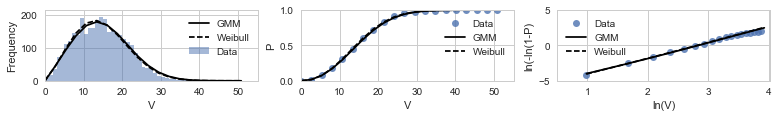

data size: 3267 weight 0.07626584494712516
GMM Weibull
R square 0.979076899859 0.97906559466
max diff: 0.0215422510308 0.0147480531312 speed value: 24.0789245735 y gmm 0.892752208718
 
225.0 (215.0 - 235.0) degree


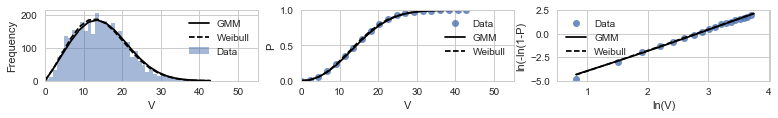

data size: 3333 weight 0.0778065690874711
GMM Weibull
R square 0.964279143283 0.966489436416
max diff: 0.0190530491989 0.0107764966141 speed value: 22.5246157508 y gmm 0.85883473958
 
245.0 (235.0 - 255.0) degree


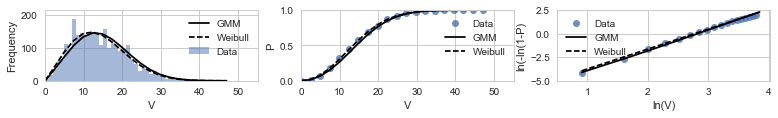

data size: 2665 weight 0.06221257324275743
GMM Weibull
R square 0.915302478914 0.939611794597
max diff: 0.0557569416036 0.01555820347 speed value: 9.90035894419 y gmm 0.263567636258
 
265.0 (255.0 - 275.0) degree


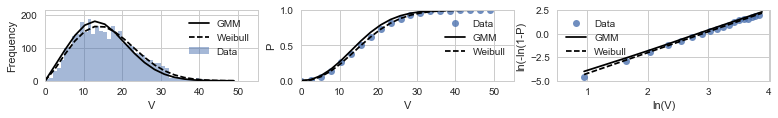

data size: 3307 weight 0.07719961715339543
GMM Weibull
R square 0.938915118736 0.964691749227
max diff: 0.0676393046974 0.0145629081903 speed value: 18.0353752297 y gmm 0.687536492481
 
285.0 (275.0 - 295.0) degree


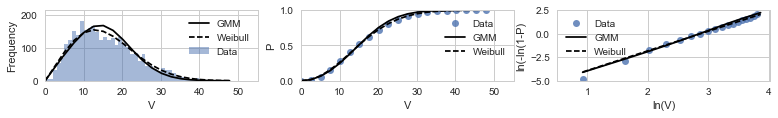

data size: 3132 weight 0.07311436375096295
GMM Weibull
R square 0.913572802388 0.955976063405
max diff: 0.0404596053689 0.0190967538956 speed value: 25.1587361742 y gmm 0.906998558115
 
305.0 (295.0 - 315.0) degree


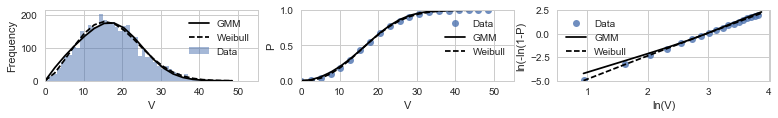

data size: 3596 weight 0.08394612134369821
GMM Weibull
R square 0.970017417857 0.979902340016
max diff: 0.0230834770072 0.00956128246301 speed value: 7.65624856419 y gmm 0.120970017608
 
325.0 (315.0 - 335.0) degree


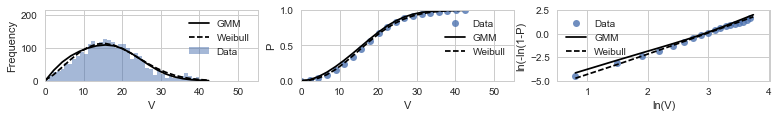

data size: 2358 weight 0.05504587155963303
GMM Weibull
R square 0.923303759293 0.948172521507
max diff: 0.0592595323601 0.0191370913851 speed value: 11.152073025 y gmm 0.290387607
 
345.0 (335.0 - 355.0) degree


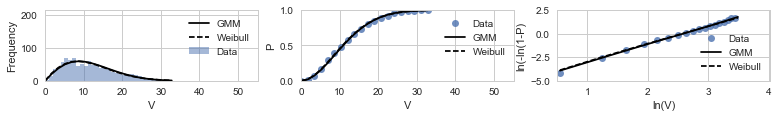

data size: 950 weight 0.02217708989891916
GMM Weibull
R square 0.906228687106 0.917383064714
max diff: 0.0387485025832 0.0266088380558 speed value: 8.63925444318 y gmm 0.360198865838
 
Wall time: 1min 8s


In [58]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
max_diff_array, curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle)

0.9306823084567535 0.95105545600666


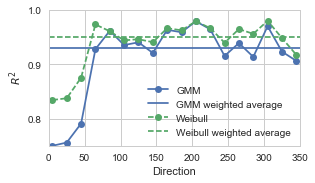

In [59]:
diff_df = pd.DataFrame(max_diff_array,columns=['datasize','direction', 'gmm', 'speed_gmm',
                                               'weibull', 'speed_weibull', 'r_square_gmm', 'r_square_weibull'])  

gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.r_square_gmm, diff_df.r_square_weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$")
plt.gca().set_ylim(top=1)
print(gmm_mean, weibull_mean)

0.046877020838194214 0.020762981149221912


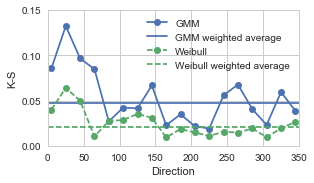

In [60]:
gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.gmm, diff_df.weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S")
ylim = max(plt.gca().get_ylim()[1],0.15)
plt.gca().set_ylim(top=ylim, bottom=0)
print(gmm_mean, weibull_mean)

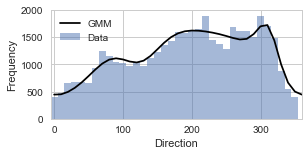

In [61]:
# Compare direction weight with previous figure
display(dir_fig)

### 5.3.1 Data Variability, by Bootstrap (Resampling)

In [62]:
max_diff_element = max(max_diff_array, key=lambda x: x[2])
angle =  max_diff_angle = max_diff_element[1]
incre = rebinned_angle

In [63]:
FRACTION = 1

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
weibull_params = sp.stats.weibull_min.fit(sub_df.speed, loc=0)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:21: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:28: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:40: RuntimeWarning: divide by zero encountered in log


25.0 (15.0 - 35.0) Degree Speed Distribution
0.122286915803 9.0 0.444478662832


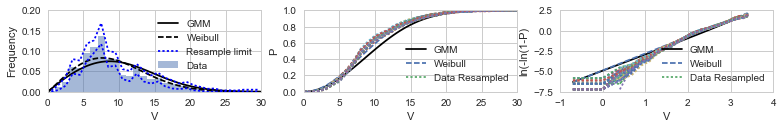

In [64]:
fig = plt.figure(figsize=(13,1.5))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)   

x = arange(0, sub_max_speed, 0.5)

# 1. Data
bins=arange(0, sub_max_speed)
sub_df['speed'].hist(ax=ax1, bins=bins, alpha=0.5, label='Data', normed=True)  

# 2. GMM
y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_ in x]
direction_prob = integrate.nquad(f, [[0, inf], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm = array(list(zip(*y_gmm_))[0])/direction_prob[0]/0.02  
y_gmm_cdf_ =[integrate.nquad(f, [[0, x_val],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
y_gmm_cdf = array(list(zip(*y_gmm_cdf_))[0])/direction_prob[0]
ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(x, y_gmm_cdf,'-', color = 'black', label='GMM')
ax3.plot(log(x), log(-log(1-y_gmm_cdf)),'-', color = 'black',label='GMM')

# 3. Weilbull 
y_weibull = sp.stats.weibull_min.pdf(x, *weibull_params)
y_weibull_cdf = sp.stats.weibull_min.cdf(x, *weibull_params)
ax1.plot(x, y_weibull,'--',color='black',label='Weibull')
ax2.plot(x, y_weibull_cdf,'--',label='Weibull')
ax3.plot(log(x), log(-log(1-y_weibull_cdf)),'--',label='Weibull')

# 4. Data Resampled
count_collection = []
for i in range(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)    
    resampled_count, _ = np.histogram(sub_df_resampled['speed'], bins=bins, normed=True) 
    count_collection.append(resampled_count)
    
    ecdf = sm.distributions.ECDF(sub_df_resampled.speed)
    y_ecdf = ecdf(x) 
    ax2.plot(x, y_ecdf,':', label='Data Resampled')
    ax3.plot(log(x), log(-log(1-y_ecdf)),':', label='Data Resampled')
    if i == 1: 
        plt_configure(ax=ax2, xlabel='V',ylabel='P',legend={'loc':'best'})
        plt_configure(ax=ax3, xlabel='V',ylabel='ln(-ln(1-P)',legend={'loc':'best'})

print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
count_collection = np.array(count_collection)
mx, mn = np.max(count_collection,0), np.min(count_collection,0)
ax1.plot(bins[1:]-0.5, mx, ':', color='blue')
ax1.plot(bins[1:]-0.5, mn, ':', color='blue', label='Resample limit')
ax1.set_ylim(bottom = 0)
plt_configure(ax=ax1, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.locator_params(axis='y', nbins=5)
ax2.locator_params(axis='y', nbins=5)
ax3.locator_params(axis='y', nbins=5)

diff = abs(y_ecdf - y_gmm_cdf)
print(diff.max(), x[diff.argmax()], y_gmm_cdf[diff.argmax()])

### 5.3.2 Time Variability

In [65]:
fig_time_variability_3d = plt.figure()
ax1 = fig_time_variability_3d.gca(projection='3d')

fig_time_variability_cdf,ax2 = plt.subplots(figsize=(3,1.8))
fig_time_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))
 
x = arange(0, sub_max_speed, 0.5)

# 1. GMM
direction_prob = integrate.nquad(f, [[0, inf], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]])
y_gmm_ =[integrate.nquad(f, [[x_-0.01, x_+0.01], [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
          for x_ in x]
y_gmm = array(list(zip(*y_gmm_))[0])/direction_prob[0]/0.02
y_gmm_cdf_ =[integrate.nquad(f, [[0, x_val],
                         [angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) for x_val in x]
y_gmm_cdf = array(list(zip(*y_gmm_cdf_))[0])/direction_prob[0]

ax2.plot(x, y_gmm_cdf,'-', color='black', label = 'GMM')
ax3.plot(log(x), log(-log(1-y_gmm_cdf)),'-', color='black',label='GMM')

# 2. Weibull
y_weibull = weibull_min.pdf(x, *weibull_params)
y_weibull_cdf = weibull_min.cdf(x, *weibull_params)
ax2.plot(x, y_weibull_cdf,'--', label='Weibull')
ax3.plot(log(x), log(-log(1-y_weibull_cdf)), '--', label='Weibull')

# 3. Data
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])
for start_time in range(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    time_label = start_time//10000
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, sub_max_speed_other_year = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_ecdf = ecdf(x)
        ax2.plot(x, y_ecdf,':', label = time_label)
        ax3.plot(log(x), log(-log(1-y_ecdf)),':', label = time_label)
        
        title = '%s - %s' %(time_label, time_label+4)
        count, division = np.histogram(df_other_years_at_angle['speed'], normed=True,
                                       bins=arange(0, sub_max_speed_other_year))
        ax1.bar(left=division[:-1], height=count, zs=time_label, zdir='x', 
                color=next(prop_cycle), alpha=0.8)
        x_3d = time_label*np.ones_like(x)
        ax1.plot(x_3d, x, y_gmm, '-', color='black', label='GMM'  if time_label == 2010 else '')
        ax1.plot(x_3d, x, y_weibull, '--', color='blue', label='Weibull' if time_label == 2010 else '')
        
print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
ax1.set_ylim(bottom = 0)
ax1.set_zlabel('Frequency')
plt_configure(ax=ax1, xlabel='Time',ylabel='V', legend=True)
plt_configure(ax=ax2, xlabel='V',ylabel='P',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
ax1.set_zlim(bottom = 0)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:39: RuntimeWarning: divide by zero encountered in log


25.0 (15.0 - 35.0) Degree Speed Distribution


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXl8W9WZ//+5V5tted/jLYuxCSlQIKUsIRnK3rSZ9gcl
CVBKQ+hCmWmBDgxlWspQChTaGfiypBSGtqG0pHQ6v5IpS1+BUGjgSyEQICxJcBIncWwttqxdd//+
oZybq6sr6Uq6sqXovF8vXjiSdXSs5Xzu85zn+RxGURQFFAqFQqFQssLO9gQoFAqFQqkEqGBSKBQK
hWICKpgUCoVCoZiACiaFQqFQKCaggkmhUCgUigmoYFIoFAqFYgIqmBQKhUKhmIAKJoVCoVAoJqCC
SaFQKBSKCahgUigUCoViAiqYFAqFQqGYgAomhUKhUCgmoIJJoVAoFIoJqGBSKBQKhWICKpgUCoVC
oZiACiaFQqFQZoz9+/fj29/+NlauXImvfOUr+PrXv45du3bh/vvvxzHHHAOPx6P+7uTkJD7xiU/g
j3/8Iw4cOICjjz4av/jFL1LG++Y3v4nLL798RuZOBZNCoVAoM0I8HsfVV1+NNWvW4Pe//z3Wr1+P
f/qnf8Jtt90GAJg3bx6effZZ9fefeeYZzJkzR/33wMAAnn/+efXfgUAAo6OjMzZ/+4w9E4VCoVDK
hhtuuAFPPfWUpWNefPHFuOeeezLev3nzZpx66qk48cQT1duOP/54rF+/Hg888ACWL1+O5557Dl/9
6lfV3//MZz6j/m5LSwuam5sxMjKCwcFBPPvss7jgggvw5ptvWvp3ZIJGmBQKhUKZEQ4cOICBgQH1
31dffTUuv/xyXHDBBZiYmEB7eztqa2uxf/9+jI6Ooru7Gy6XK2WMz33uc/jzn/8MAHjhhRdwzjnn
zNj8aYRJoVAoVcg999yTNRosBd3d3di+fbv673Xr1gEAVq5cCUmSABwWRFEUsWLFCmzZsiVljHPO
OQeXXXYZLrzwQnR0dKCmpmbG5k8jTAqFQqHMCGeffTZee+01bNu2Tb1tdHQUExMTYBgGAHD++efj
hRdewJtvvolTTjklbQy324358+fjnnvuwec///kZmztABZNCoVAoM4Tb7ca6devw61//Gl/+8pex
evVq3Hzzzfje976Hnp4eAEBDQwO6u7uxaNEisKyxRK1YsQJbt27FaaedNpPTB6MoijKjz0ihUCgU
SgVCI0wKhUKhUExABZNCoVAoFBPQKllKVSLLMkRRBM/zsNlsYFkWNpsNNptNLT6gUCgULVQwKVWF
LMvweDxoaWlR/60oChRFQTQaRTgcRk9PD1iWBcMwVEgpFIoKFUxKVSDLMiRJgizLGB8fR3NzM2RZ
hiAIcDgcqhgSASU9YaQmjmEYVUCpkFIo1QkVTMoRDUm9aovBFUWBz+fD1NQUGIaBJElwOp1gWRai
KCIajcLpdMJut6eIoVkhtdvt6r8pFMqRAy36oRyRSJIEnufB87wqbqIoqich8DyP+fPnY/78+Viw
YAE6OzvhcrmgKAoCgQD27duHkZER7Nu3DxMTEwgEAohGo6r4EqEEDgupKIrgOE5N7UYiEcRiMcTj
cXAcB0mSQLu4KNXMFVdcgXfffRdA8ju4ePFiPProo+r9l19+OT788MO0x7388svYsGEDDhw4gJUr
V5p+viVLlqjjjoyMFDl7GmFSjjAkSVJTr0TURFGE3+9HIBBAY2MjWJbFnDlzYLPZ1KKf2tpaKIoC
juPQ19enjsVxHHieB8dxiEQiqgC7XC44nU44nU7151wRKcdxAACWZdUIlKR1aURKqQaWLFmCN998
E8cffzy2bt2KM844A3/9619x1VVXgeM4jI2NYeHChWmPW7ZsGYCkF+1sQgWTckRgJJSCIMDv92N6
ehpNTU0YHByE0+lEOBxOSalmwmazoa6uDnV1dSm3k+paIqaRSAQcx4FhmBQBJT/r9zm1QioIghqx
kn1R7c9USCmlZN689NsuuQS4887C7t+7N/vznX766XjooYdw5ZVX4q9//Ssuvvhi/PSnP0U4HMb7
77+PT3/603jjjTfwn//5n7DZbOjv78dtt92GjRs3Yvfu3Vi9ejWmpqbwzW9+E5OTkzjzzDNxzTXX
4KabbsLy5cuxbNkyvPzyy3jmmWdw11135fdimIAKJqWiMRJKnufh9/sRDAbR3NyMo446Cg6HI+dY
DMOYSpna7XbY7fYUISUiSEQ0kUggFAqB53kwDKOKqFZMiThqU7uiKKo/EyHVCqckSYYiTKFUAosW
LcLu3buhKAreeOMNXH/99TjttNPw6quvYseOHTjjjDPwgx/8AL/97W/R1taGe++9F//zP/8Du/2w
VMViMdxzzz2oq6vDZZddhrPPPnvG5k8Fk1JxKIqSUvWqFUqfz4dQKISWlhYMDQ2lfNEIZoUxHxiG
UYXU7XanzJXsbfI8j3g8junpaTUVrBVR8n8ijtrKXVmWAQAff/wx5s2bpxYW6YuNtI+jUHKRKyIs
9n49LMti4cKFePnll9HR0QGn04lly5bhpZdewkcffYTLLrsMP/jBD3DttdcCABKJBE4//XTMnTtX
HWPhwoVoaGgAABx33HHYs2dPynOUsk6ACialYsgklBzHwefzIRwOo7W1NaNQEjIJZqmE1OFwpEW4
iqJAEAS1MCkWi6lCarfb0/ZHiZCSMYFUIdWmmDPtkVIo5cCSJUvw8MMP43Of+xwAYPHixXjooYcA
JA+I7u7uxkMPPYSGhga88MILqKurw/j4uPr4kZERRKNRuFwuvPvuu1i1ahVee+01+Hw+AMAHH3xQ
srlTwaSUPUQo9RWqHMfB6/UiEomYEko9sxmJkf1Op9OZcjsRUu3+KM/zEAQBdrsdsixjamoKNTU1
6uP1UaVWSHmeV59PL6T6IiUKZSY4/fTT8f3vfx933303AMDpdKKhoQHHHHMMWJbFv/3bv+HrX/86
FEWB2+3G3XffnSKYTU1NuO666zA1NYXly5fjqKOOwsUXX4ybb74ZGzduxDyjjVeLoKeVUMoWRVEQ
j8cRDAbR0tKiLu6JRAI+nw+RSARtbW1oa2uDzWYzPe6uXbvQ39+PmpoaVVAAgOM4jI+Pl/QLVyiK
ooDneezbtw/Nzc2qqIqiCIfDkZba1ZoxZBoPSBdSu91O90cplAzQCJNSdpACGkmSkEgkEAgE0Nra
ing8Dp/Ph1gshra2NvT09OQllIRSpF5LDSkcYhgGra2t6t9N3IpIREoKjYiQ6vdHiZDmE5FSVyMK
JQkVTErZoBVKbauFJEkYHR1FPB5He3s7+vr6it6Tm6k9zFLDsixcLhdcLlfK7bIsp7S+kP1R4mqk
b30xKhgiQqp9TUg6l9oDUqoRKpiUWcdIKBmGQSwWw8TEBHieR1tbG/r7+y0pXqmGxZ1lWdTU1KCm
pibldq0DEsdxiMVi4DgOsiwbtr4Y7XPq7QHJ85G0riAIqKmpyZkWplAqDSqYlFkjk1BGo1F4vV7w
PI+WlhYIgoC2tjbLnncmq2TLDeJqVFtbm3I7EVJ9sZGiKIatL9nMGPbu3Yuenh41hUwN6ylHClQw
KTOOkVACQCQSgdfrhSiK6OjoUItbAoGApc+vFcZqEEkzZBLSXK5GejG12Wwp7yk9+YVyJEEFkzJj
aE3KgcOp0XA4DK/XC0mS0NnZiaamJvW+mRQ0Kp7pFOJqpG19MRORZkrt0pNfKOUGFUxKySFmA2SB
JMIUCoXg8/kgyzI6OzvR2NiYtjCWykyACmPh5HI1Gh0dhd1uRyKRQDAYNOVqpB2DGtZTyhUqmJSS
oXXlIWk6RVEQDAZVV46Ojg5DoSTMpGBSIS0O4mrEMAyam5tVE4lsrkY2m82w2CibkOoN6/XtL1RI
KaWCCibFcoy

### 5.3.3 Adjacent Sector Variability

In [66]:
incre = rebinned_angle
angle_group = [max_diff_angle-incre, max_diff_angle, max_diff_angle+incre]

In [67]:
fig_adjecent_variability_3d = plt.figure()
ax1 = fig_adjecent_variability_3d.gca(projection='3d')
fig_adjecent_variability_cdf, ax2 = plt.subplots(figsize=(3,1.8))
fig_adjecent_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

legend_3d = False
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])

curve_df = pd.DataFrame(curve_collection)

for angle in angle_group:
    curves = curve_df.query('angle == @angle%360').T.to_dict()
    curves = curves[list(curves)[0]]
    data_size, x =  curves['data_size'], curves['x']
    y_gmm, y_cdf_gmm =  curves['gmm_pdf'], curves['gmm_cdf'] 
    y_weibull, y_cdf_weibull, y_cdf = curves['weibull_pdf'],  curves['weibull_cdf'], curves['ecdf']

    linestyle = '-' if angle == max_diff_angle else ':'
    alpha = 0.7 if angle == max_diff_angle else 0.3

    ax2.plot(x, y_gmm*data_size, linestyle, label=angle)        
    ax3.plot(x, y_weibull*data_size, linestyle, label=angle)

    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

    x_3d = angle*np.ones_like(x)
    ax1.plot(x_3d, x, y_gmm*data_size, color='black', label='GMM')
    ax1.plot(x_3d, x, y_weibull*data_size, color='blue', linestyle='--',label='Weibull')

    count, division = np.histogram(sub_df['speed'], bins=arange(0, sub_max_speed))
    ax1.bar(left=division[:-1], height=count, zs=angle, zdir='x', color=next(prop_cycle), alpha=0.8)

    if legend_3d == False:
        ax1.legend()
        legend_3d = True
        
plt_configure(ax=ax1, xlabel='Direction', ylabel='Speed')   
plt_configure(ax=ax2, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.set_zlabel('Frequency')
ax1.set_zlim(bottom = 0)
ylim = max(ax1.get_ylim()[1],ax3.get_ylim()[1])
ax2.set_ylim(bottom = 0, top=ylim)
ax3.set_ylim(bottom = 0, top=ylim)

print(max_diff_angle) 
print('GMM, Weibull, Histogram')
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


25.0
GMM, Weibull, Histogram


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAcwAAAE5CAYAAAAdhBAsAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsfXuUHGWd9lN9m+npud/vySQMhBBGImCCcbOy4MZF+VAX
shIJyk3kc8XgWRVQQAV1JYh4WMMqrLqCawjrDVfAc0QBP8hRMG6QQMhlLslMZvo2PX2vvlV9f4S3
8nZNVXdVdVVNz8z7nMMh0zNv/6qqq9+nfrfnx4miKIKBgYGBgYGhJBwLfQAMDAwMDAyLAYwwGRgY
GBgYNIARJgMDAwMDgwYwwmRgYGBgYNAARpgMDAwMDAwawAiTgYGBgYFBAxhhMjAwMDAwaAAjTAYG
BgYGBg1ghMnAwMDAwKABjDAZGBgYGBg0gBEmAwMDAwODBjDCZGBgYGBg0ABGmAwMDAwMDBrACJOB
gYGBgUEDGGEyMDAwMDBoACNMBgYGBgbbcPz4cdx8883YunUrrr76anz84x/H4cOH8eCDD+LMM8+E
3++X/jYcDuOss87Cz372M0xOTuKMM87A9773vaL3+8QnPoHt27fbcuyMMBkYGBgYbEE6ncZNN92E
a665Bnv27MGPfvQj/PM//zO+8pWvAABWrlyJp59+Wvr7p556Cj09PdLPg4OD+M1vfiP9HIlEMDEx
Ydvxu2yzxMDAwMBQNfjsZz+LJ554wtT3vOKKK7Bz507V3//+97/Hxo0bsX79eum1kZER/OhHP8K/
/du/4ZJLLsEzzzyDj33sY9LfX3jhhdLftrS0oLm5GUePHsXq1avx9NNP473vfS9eeeUVU89DDczD
ZGBgYGCwBZOTkxgcHJR+vummm7B9+3a8973vxczMDNrb2+H1enH8+HFMTEygu7sbNTU1Re/xvve9
D7/+9a8BAM8++ywuvvhi246feZgMDAwMyxA7d+4s6Q1age7ubrz22mvSzw899BAAYOvWrSgUCgBO
EWI+n8ell16KF198seg9Lr74YnzkIx/Bhz70IXR0dKC2tta242ceJgMDAwODLbjooouwd+9e/O//
/q/02sTEBGZmZsBxHABgy5YtePbZZ/HKK69gw4YN897D5/NhaGgIO3fuxPvf/37bjh1ghMnAwMDA
YBN8Ph8eeugh/Od//ieuuuoqfPjDH8btt9+O2267Db29vQCAhoYGdHd3Y+3atXA4lCnq0ksvxZ//
/GdccMEFdh4+OFEURVstMjAwMDAwLEIwD5OBgYGBgUEDGGEyMDAwMDBoAKuSZViWEAQB+Xwe2WwW
TqcTDocDTqcTTqdTKj5gYGBgoMEIk2FZQRAE+P1+tLS0SD+LoghRFJFMJhGPx9Hb2wuHwwGO4xiR
MjAwSGCEybAsIAgCCoUCBEHA9PQ0mpubIQgCcrkc3G63RIaEQElPGKmJ4zhOIlBGpAwMyxOMMBmW
NEjolS4GF0URwWAQs7Oz4DgOhUIBHo8HDocD+XweyWQSHo8HLperiAy1EqnL5ZJ+ZmBgWDpgRT8M
SxKFQgHZbBbZbFYit3w+L01CyGazGBoawtDQEFatWoXOzk7U1NRAFEVEIhEcO3YMR48exbFjxzAz
M4NIJIJkMimRLyFK4BSR5vN5ZDIZKbSbSCSQSqWQTqeRyWRQKBTAurgYljM++tGP4tVXXwVw8jt4
7rnn4pFHHpF+v337drzxxhvz1r3wwgt4/PHHMTk5ia1bt2q2t2nTJul9jx49WuHRMw+TYYmhUChI
oVdCavl8HqFQCJFIBI2NjXA4HOjp6YHT6ZSKfrxeL0RRRCaTQX9/v/RemUwG2WwWmUwGiURCIuCa
mhp4PB54PB7p3+U80kwmg3w+j0gkgp6eHnAcJ4V1mUfKsBywadMmvPLKKxgZGcGf//xnvOtd78Lz
zz+P66+/HplMBlNTU1izZs28dZs3bwZwUot2IcEIk2FJQIkoc7kcQqEQ5ubm0NTUhNWrV8Pj8SAe
jxeFVNXgdDpRV1eHurq6otdJdS0h00QigUwmA47jigiU/JvOc5LiIkKkuVxO8lhJXpT+NyNSBiux
cuX81668Evj61439fny8tL13vvOd2LVrF6699lo8//zzuOKKK3DfffchHo/jwIEDeMc73oGXX34Z
3/rWt+B0OjEwMICvfOUr+NWvfoXR0VF8+MMfxuzsLD7xiU8gHA7j3e9+Nz75yU/i1ltvxSWXXILN
mzfjhRdewFNPPYV//dd/1XcxNIARJsOihhJRZrNZhEIhRKNRNDc347TTToPb7S77XhzHaQqZulwu
uFyuIiIl3iQhUZ7nEYvFkM1mwXGcRKJOp1MqQCLkSJNpPp+X/k2IlCZORqQMixlr167F6OgoRFHE
yy+/jM985jO44IIL8NJLL+HNN9/Eu971Ltxxxx34r//6L7S1teGBBx7Az3/+c7hcp6gqlUph586d
qKurw0c+8hFcdNFFth0/I0yGRQdRFCEIAkKhEDKZDLq6uiSiDAaDiMViaGlpwfDwcNEXjUArMeoB
x3ESkfp8vqJjJbnNbDaLdDoNQRAwOjoKp9NZ5JGS/xMypCt3BUGQ3o/Yczgc84qN6HUMDOVQziOs
9PdyOBwOrFmzBi+88AI6Ojrg8XiwefNmPPfcczh48CA+8pGP4I477sCOHTsAADzP453vfCdWrFgh
vceaNWvQ0NAAADj77LMxNjZWZMPKOgFGmAyLBoQoiUdJvMtMJoNgMIh4PI7W1lZVoiRQI0yriNTt
dksebjabxdTUFFauXIlcLicVJqVSKczNzSGbzcLlcs3Lj9JESlCKSJPJJLxeL2prayWPlIGhGrBp
0yZ897vfxfve9z4AwLnnnotdu3YBODkguru7G7t27UJDQwOeffZZ1NXVYXp6Wlp/9OhRJJNJ1NTU
4NVXX8U//dM/Ye/evQgGgwCA119/3bJjZ4TJUPUgRCmvUM3n80gkEohGo5qIUo6F8MQIKZN8p8fj
Kfq9KIrI5XJF+dFsNotcLgeXyzXPG/V4PPO8SkEQEA6H0dLSouqROp3OeUVKDAx24J3vfCe++MUv
4t577wUAeDweNDQ04Mwzz4TD4cAXvvAFfPzjH4coivD5fLj33nuLCLOpqQm33HILZmdncckll+C0
007DFVdcgdtvvx2/+tWvsFIp8WoS2LQShqoFyQuSdgyyufM8L3mUHo8HQ0NDcDqdmt/38OHDGBgY
QG1tLbLZrPR6JpPB9PS0pV+4XC6H48ePY9WqVbrWiaIoeaN05W4+n4fb7Z4X2vX7/WhtbS0KD8vf
D5hPpC6Xi4kxMDCogHmYDFUHJaLkOA7pdBrBYBCpVAptbW3w+XxIJpO6yBKwJvRqNUjhUE1NjZS/
ASCpFRESJYVGuVwOfr8fXq+3iEyJqpFaaJc8QNBEylSNGBhOghEmQ9VAjShTqRSCwSDS6TTa29vR
398Ph8OBaDRqmPjsymFaDYfDIREpjePHj6O+vh4OhwPZbFbKjxJVI3nri1LBECFS+pqQcC75WxJa
ZkTKsBzACJNhwSEIAlKpFNxu9zyiDAQC4HkeHR0dGBgYKCpeMUpwC72520XKHo9nXkiWVkDKZDJI
pVLIZDIQBEExP6qU5yQ9pIVCAUePHsXw8PC8il3mkTIsRTDCZFgwEI+S53kcPXoUa9asAcdxSCaT
CAQCyGaz6OjowODgoGKVZyWEuVAepp0EomSLqBp5vd6i1wmRyouNRFFUbH2Re5lMsJ5hOYARJoPt
UAq9FgoFJBIJBAIB5PN5dHR0oLm5ueTGagZhLsYwrBVQI9JSqkYkIjA3N6eoagRoF6xnRMqwGMAI
k8E20CLlwCkPKJlMQhRFnDhxAp2dnWhqatK0cZpNdow856OUqlE6ncbMzIyqqpGSRyp/D/JvAiUx
BqZqxFAtYIT

# 6. Result Variability & Cross-Validation

In [68]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

## 6.1 Variability of the Result

weight  mean_x   mean_y   sig_x   sig_y    corr
1  0.679  -5.972   -4.835  10.068  10.218  -0.237
2  0.214   1.661    8.704   6.918   6.819  -0.042
3  0.107  10.472  -12.979   6.822   6.620  -0.351

GMM Plot Result
0.67912609224 [[-5.97234602 -4.83537338]] [  8.85921992  11.28147266] -136.785384142
0.214093557387 [[ 1.66064617  8.70428097]] [ 6.71379202  7.02032135] -125.614668818
0.106780350373 [[ 10.471805   -12.97876485]] [ 5.41070623  7.81515194] -132.550892246


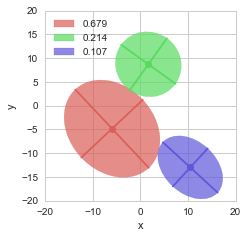

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.014      0.038  2.168299e-09      0.036       0.155

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.016      0.041  2.132505e-09      0.036       0.154

weight  mean_x   mean_y  sig_x   sig_y    corr
1  0.712  -5.836   -4.431  9.983  10.350  -0.215
2  0.188   2.191    9.134  6.530   6.788  -0.122
3  0.100  11.046  -12.996  6.675   6.117  -0.359

GMM Plot Result
0.711813350433 [[-5.83595945 -4.43121848]] [  8.9922819   11.22159717] -139.775681073
0.188372202967 [[ 2.19078082  9.13393401]] [ 6.22124813  7.07277131] -143.835253217
0.0998144465994 [[ 11.04575783 -12.99622962]] [ 5.0909653   7.48680353] -128.146783903


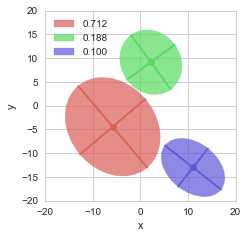

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.981  0.014      0.053  2.063139e-09      0.034       0.151

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.017      0.064  2.114304e-09      0.036       0.153

weight  mean_x   mean_y  sig_x   sig_y    corr
1  0.698  -6.148   -3.791  9.849  10.348  -0.164
2  0.174   2.467    9.605  6.292   6.531  -0.097
3  0.128   9.965  -13.048  7.008   6.229  -0.279

GMM Plot Result
0.698074446871 [[-6.14754868 -3.79139087]] [  9.19774081  10.93153574] -143.395023599
0.174409230588 [[ 2.46653818  9.60475082]] [ 6.07160244  6.73697884] -145.535009876
0.127516322541 [[  9.96511746 -13.04755886]] [ 5.54251755  7.56272557] -123.549390134


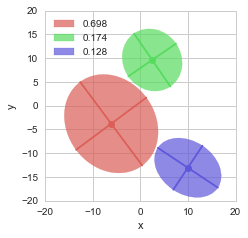

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.015      0.050  2.202757e-09      0.036       0.156

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.015      0.060  2.151345e-09      0.036       0.155

weight  mean_x   mean_y  sig_x   sig_y    corr
1  0.678  -6.319   -4.309  9.773  10.408  -0.201
2  0.194   2.254    9.198  6.522   6.742  -0.120
3  0.128  10.107  -12.761  7.030   6.465  -0.311

GMM Plot Result
0.678055568401 [[-6.31921608 -4.30933468]] [  8.97175359  11.10614307] -143.698090361
0.193588359022 [[ 2.25419194  9.19832574]] [ 6.20648263  7.03405348] -142.713428302
0.128356072577 [[ 10.10737754 -12.76081579]] [ 5.56341254  7.76273808] -127.453509574


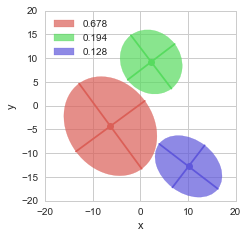

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.015      0.059  2.097663e-09      0.037       0.153

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.014      0.063  2.128263e-09      0.036       0.154

weight  mean_x   mean_y   sig_x   sig_y    corr
1  0.716  -5.515   -4.731  10.430  10.357  -0.267
2  0.203   1.696    9.013   6.776   6.793  -0.072
3  0.081  11.332  -13.362   6.644   5.981  -0.431

GMM Plot Result
0.715887785965 [[-5.51523022 -4.73076428]] [  8.89847443  11.69928749] -134.24837795
0.203469625292 [[ 1.69627585  9.01317637]] [ 6.53707202  7.02357797] -135.981138217
0.0806425887424 [[ 11.33196123 -13.36176413]] [ 4.72500648  7.5890023 ] -128.134032053


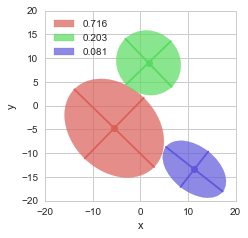

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.015      0.045  2.190375e-09      0.036       0.156

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.016      0.049  2.142153e-09      0.036       0.154

weight  mean_x   mean_y   sig_x  sig_y    corr
1  0.508  -5.643    3.945   9.781  9.924   0.382
2  0.456   1.732  -10.460  10.946  8.124  -0.231
3  0.036   4.971    5.767   3.106  4.714  -0.479

GMM Plot Result
0.508343240372 [[-5.64264062  3.9447102 ]] [  7.74348462  11.58490172] 136.087636549
0.455822598263 [[  1.73226251 -10.46021077]] [  7.68382328  11.25927098] -108.695816765
0.0358341613657 [[ 4.9712289   5.76695395]] [ 2.55362989  5.03446708] -155.947680847


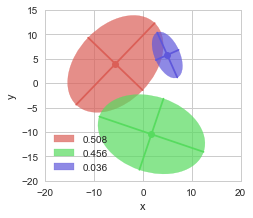

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.984  0.008      0.026  1.724387e-09      0.032       0.139

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.007      0.027  1.941948e-09      0.034       0.147

weight  mean_x   mean_y   sig_x   sig_y    corr
1  0.674  -6.202   -4.681  10.206  10.210  -0.225
2  0.218   1.721    9.076   6.903   6.910  -0.072
3  0.108  10.522  -12.922   6.999   6.257  -0.304

GMM Plot Result
0.674366376917 [[-6.20178044 -4.68121771]] [  8.98386849  11.29985274] -135.047942759
0.217969955482 [[ 1.72137757  9.07557252]] [ 6.65346694  7.15058986] -135.397241521
0.107663667601 [[ 10.52220565 -12.92177125]] [ 5.46549732  7.63293309] -124.856345152


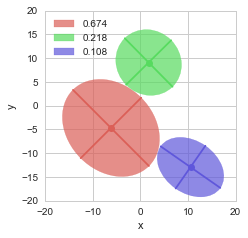

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.013      0.035  2.132581e-09      0.035       0.154

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.014      0.040  2.156462e-09      0.036       0.155

weight  mean_x   mean_y   sig_x   sig_y    corr
1  0.546  -5.723    3.190   9.854  10.014   0.366
2  0.411   2.293  -10.894  10.516   7.848  -0.209
3  0.043   4.869    5.802   3.159   5.218  -0.486

GMM Plot Result
0.545881442538 [[-5.72305357  3.18989781]] [  7.90857741  11.61122391] 136.259647372
0.411436416613 [[  2.29336425 -10.89357211]] [  7.4914677   10.77332246] -107.587581322
0.0426821408489 [[ 4.86939834  5.80248014]] [ 2.6128172  5.5120995] -158.545835061


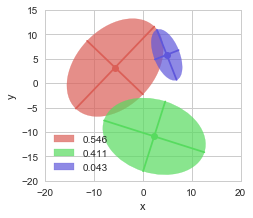

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.983  0.008      0.024  1.911910e-09      0.033       0.146

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.982  0.008      0.026  1.915943e-09      0.034       0.146

weight  mean_x  mean_y  sig_x   sig_y    corr
1  0.410  -0.595   6.301  8.356   7.782   0.043
2  0.358  -9.249  -8.605  9.918  10.699  -0.531
3  0.232   5.234  -9.788  9.954   6.800  -0.588

GMM Plot Result
0.409856776842 [[-0.59480668  6.30080417]] [ 7.7323293   8.40224102] -74.5000669775
0.357659789647 [[-9.24860288 -8.60519965]] [  7.03446972  12.78053505] -139.066467528
0.232483433511 [[ 5.23418628 -9.78761089]] [  4.9892272  10.9738047] -118.211824388


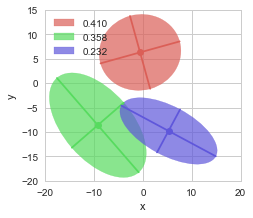

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.981  0.009      0.024  2.096550e-09      0.036       0.153

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.010      0.025  2.194214e-09      0.036       0.156

weight  mean_x  mean_y   sig_x   sig_y    corr
1  0.648  -4.495  -7.122  11.998  10.181  -0.338
2  0.279   0.013   8.063   7.840   6.891   0.054
3  0.073   3.607  -8.814  11.275   5.548  -0.814

GMM Plot Result
0.647799883936 [[-4.49485026 -7.1217324 ]] [  8.82406264  13.02862749] -121.995404772
0.279459564615 [[ 0.01270065  8.06286675]] [ 6.84847279  7.87724078] -78.702196957
0.0727405514485 [[ 3.60721845 -8.81429446]] [  2.97812341  12.20788808] -113.292714742


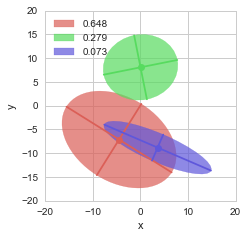

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.981  0.009      0.032  2.006554e-09      0.035       0.149

R_square    K_S Chi_square           MSE RMSE / Max RMSE / Mean
0    0.980  0.011      0.029  2.148774e-09      0.036       0.154


Wall time: 1min 4s


In [69]:
%%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, FIT_METHOD, NUMBER_OF_GAUSSIAN, config) for i in range(10))                        
for result in results:
    display(pretty_print_gmm(result['gmm']))
    fig,ax = plt.subplots(figsize=(3.5,3.5))
    plot_gmm_ellipses(result['gmm'],ax=ax)
    plt.show()
    
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))
    display(gof_df(result['gmm_pdf_result'], kde_result))
    print('')

## 6.2 Cross-validation, to select the number of Gaussian

In [70]:
%%time
from sklearn.cross_validation import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,6)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print('Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold) 

for number_of_gaussian in gaussian_number_range:
    print( '  ')
    print('Number of gaussian', number_of_gaussian)
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf)                        

    CV_result_train, CV_result_test = list(zip(*CV_result))
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print('Train')
    pretty_pd_display(CV_result_train)
    print('Test')
    pretty_pd_display(CV_result_test)

Number of train/test dataset 32127.75 10709.25
  
Number of gaussian 1
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.078050  0.022111  8.552522e-09    0.072611     0.308073  0.921771
1    0.078950  0.021085  8.215398e-09    0.069656     0.302020  0.923874
2    0.077196  0.020116  8.414112e-09    0.071430     0.305784  0.922031
3    0.073069  0.020823  8.063918e-09    0.068800     0.299424  0.925559

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.079519  0.023794  8.438692e-09    0.067075     0.306597  0.920487
1    0.078529  0.028457  9.188286e-09    0.074708     0.319673  0.916539
2    0.079438  0.023268  8.113595e-09    0.068377     0.300004  0.926402
3    0.092954  0.025709  9.426517e-09    0.077993     0.323138  0.913355

  
Number of gaussian 2
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.036320  0.011619  2.884708e-09    0.041725     0.178934  0.973373
1    0.033375  0.010997  2.804236e-09    0.041586     0.176582  0.974023
2    0.028961  0.010751  2.657529e-09    0.039611     0.171794  0.975559
3    0.031902  0.010768  2.688785e-09    0.039612     0.172814  0.975205

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.036021  0.010442  2.863952e-09    0.040981     0.178571  0.973682
1    0.036854  0.014197  3.007329e-09    0.040568     0.182485  0.972633
2    0.040410  0.017133  3.571555e-09    0.044805     0.199237  0.966813
3    0.039970  0.017885  3.660736e-09    0.045895     0.201665  0.966312

  
Number of gaussian 3
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.055472  0.015231  2.149891e-09    0.036256     0.154481  0.980181
1    0.067268  0.015037  2.185729e-09    0.036591     0.155778  0.979838
2    0.025950  0.007783  1.853815e-09    0.032937     0.143539  0.983005
3    0.019045  0.006740  2.009295e-09    0.034422     0.149439  0.981317

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.061074  0.015387  2.549299e-09    0.038040     0.168447  0.976486
1    0.097963  0.023409  2.802701e-09    0.039640     0.176571  0.974273
2    0.030934  0.008709  2.649378e-09    0.040567     0.171401  0.975165
3    0.035437  0.011584  3.576865e-09    0.046826     0.199150  0.967887

  
Number of gaussian 4
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.018233  0.007421  1.074169e-09    0.025463     0.109224  0.990060
1    0.017651  0.007712  1.022722e-09    0.025256     0.106607  0.990553
2    0.016165  0.008311  1.132356e-09    0.025246     0.112135  0.989616
3    0.019123  0.008865  1.075201e-09    0.025687     0.109284  0.990055

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.020515  0.006657  1.602232e-09    0.030427     0.133436  0.985383
1    0.029248  0.010396  1.892469e-09    0.032013     0.144891  0.982668
2    0.023749  0.014933  1.785692e-09    0.035721     0.140899  0.983296
3    0.027079  0.010324  1.674701e-09    0.030484     0.136389  0.984707

  
Number of gaussian 5
Train


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.184936  0.013264  1.112614e-09    0.025460     0.111174  0.989810
1    0.013637  0.008259  7.252453e-10    0.020870     0.089754  0.993304
2    0.017950  0.006592  7.588634e-10    0.020986     0.091808  0.992996
3    0.016545  0.007206  9.642816e-10    0.024645     0.103494  0.991040

Test


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
0    0.304890  0.026856  1.904006e-09    0.034310     0.145410  0.982112
1    0.017373  0.010593  1.277415e-09    0.027274     0.119121  0.988262
2    0.025657  0.008557  1.244550e-09    0.027516     0.117586  0.988547
3    0.021679  0.010230  1.767316e-09    0.029886     0.140111  0.984089

Wall time: 2min 41s


In [71]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print('Train gof mean, std')
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print('Test gof mean, std')
display(test_scores_mean)

Train gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.076816  0.021034  8.311488e-09    0.070624     0.303825  0.923309
2    0.032640  0.011034  2.758815e-09    0.040633     0.175031  0.974540
3    0.041934  0.011198  2.049683e-09    0.035051     0.150809  0.981085
4    0.017793  0.008077  1.076112e-09    0.025413     0.109313  0.990071
5    0.058267  0.008830  8.902511e-10    0.022990     0.099057  0.991787

Test gof mean, std


Chi_square       K_S           MSE  RMSE / Max  RMSE / Mean  R_square
1    0.082610  0.025307  8.791772e-09    0.072038     0.312353  0.919196
2    0.038314  0.014914  3.275893e-09    0.043062     0.190489  0.969860
3    0.056352  0.014772  2.894561e-09    0.041268     0.178892  0.973453
4    0.025148  0.010577  1.738774e-09    0.032161     0.138904  0.984013
5    0.092400  0.014059  1.548322e-09    0.029746     0.130557  0.985753

R_square


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


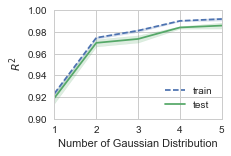

K_S


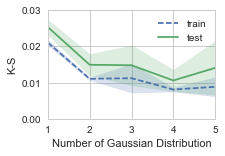

Chi_square


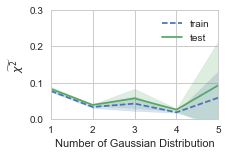

In [72]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '--', label = 'train', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print(column)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Gaussian Distribution', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    if column == 'R_square':
        plt.gca().set_ylim(top=1)
    if column == 'K_S' or column == 'Chi_square':
        plt.gca().set_ylim(bottom=0)
    plt.margins(x=0, y=0)
    plt.show()

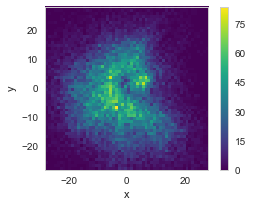

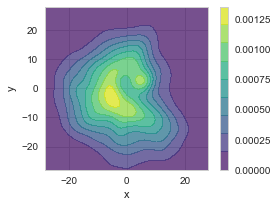

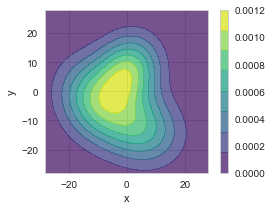

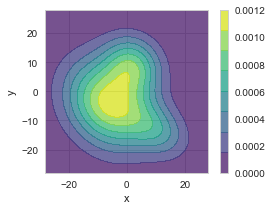

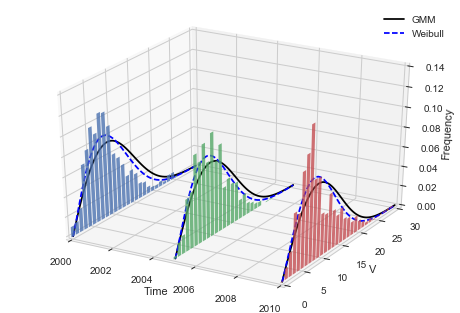

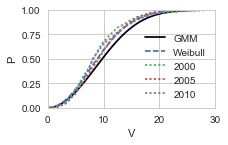

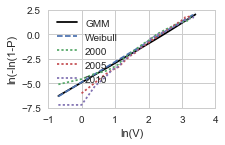

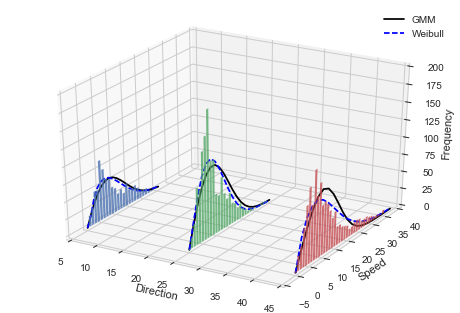

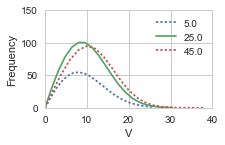

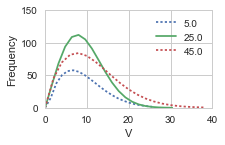

In [73]:
for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
    display(fig)
for fig in [fig_time_variability_3d, fig_time_variability_cdf, fig_time_variability_weibull, 
            fig_adjecent_variability_3d, fig_adjecent_variability_cdf, fig_adjecent_variability_weibull,]:
    display(fig)

In [74]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(file_path)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 
output_HTML(current_file, output_file)